In [3]:
import numpy as np
import random
import time
from collections import defaultdict
import os
import matplotlib.pyplot as plt

# ============ KEYBOARD LAYOUTS ============
qwerty = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p',  
        'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', ';',  
        'z', 'x', 'c', 'v', 'b', 'n', 'm', ',', '.', "'"]
dvorak = ["'", ',', '.', 'p', 'y', 'f', 'g', 'c', 'r', 'l',  
        'a', 'o', 'e', 'u', 'i', 'd', 'h', 't', 'n', 's',
        ';', 'q', 'j', 'k', 'x', 'b', 'm', 'w', 'v', 'z']
qwertz = ['q', 'w', 'e', 'r', 't', 'z', 'u', 'i', 'o', 'p',  
        'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', ';',  
        'y', 'x', 'c', 'v', 'b', 'n', 'm', ',', '.', "'"]
colemak = ['q', 'w', 'f', 'p', 'g', 'j', 'l', 'u', 'y', ';',  
        'a', 'r', 's', 't', 'd', 'h', 'n', 'e', 'i', 'o',  
        'z', 'x', 'c', 'v', 'b', 'k', 'm', ',', '.', "'"]


# Best from Exp1 - Moby Dick (Pop Size: 100000, Fitness: 769,434.6)
exp1_best_moby_dick = ['x', 'v', 'w', 'c', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', ',', '.', 'q', 'b', 'p', 'l', 'd', 'g', 'u', 'y', ';', 'j']

# Best from Exp1 - Wizard of Oz (Pop Size: 1000000, Fitness: 121,733.0)
exp1_best_wizard_oz = ['z', 'k', 'w', 's', 'h', 'i', 't', 'c', ',', ';', 'v', 'd', 'n', 'l', 'r', 'e', 'a', 'o', 'y', '.', 'q', 'x', 'b', 'f', 'm', 'g', 'u', 'p', 'j', "'"]

# Best from Exp2 - Moby Dick (Tournament k: 5, Fitness: 769,434.6)
exp2_best_moby_dick = ['x', 'v', 'w', 'c', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', ',', '.', 'q', 'b', 'p', 'l', 'd', 'g', 'u', 'y', ';', 'j']

# Best from Exp2 - Wizard of Oz (Tournament k: 10, Fitness: 122,030.3)
exp2_best_wizard_oz = ['x', 'v', 'c', 'w', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', 'g', '.', 'q', 'b', 'p', 'l', 'd', ',', 'y', 'u', 'j', ';']


# Best from Exp3 - Moby Dick (Mutation: 0.15, Fitness: 769,434.6)
exp3_best_moby_dick = ['x', 'v', 'w', 'c', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', ',', '.', 'q', 'b', 'p', 'l', 'd', 'g', 'u', 'y', ';', 'j']

# Best from Exp3 - Wizard of Oz (Mutation: 0.5, Fitness: 123,341.2)
exp3_best_wizard_oz = ['q', 'p', 'u', 't', 'i', 'h', 's', 'c', 'b', 'x', '.', 'y', 'o', 'a', 'e', 'n', 'r', 'l', 'm', 'v', ';', 'j', ',', 'g', 'k', 'w', 'd', 'f', 'z', "'"]


# Best from Exp4 - Moby Dick (Elite: 20pct, Fitness: 765,886.5)
exp4_best_moby_dick = ["'", 'z', 'w', 't', 'i', 'h', 'c', 'f', 'k', 'x', '.', ',', 'o', 'a', 'e', 'n', 's', 'r', 'm', 'v', 'j', ';', 'y', 'u', 'g', 'd', 'l', 'p', 'b', 'q']

# Best from Exp4 - Wizard of Oz (Elite: 5pct, Fitness: 120,633.7)
exp4_best_wizard_oz = ['j', ';', 'p', 'y', ',', 'd', 'l', 'm', 'b', "'", '.', 'u', 'o', 'a', 'e', 'n', 's', 'r', 'f', 'v', 'q', 'z', 'g', 't', 'i', 'h', 'w', 'c', 'k', 'x']


# BEST OVERALL - Moby Dick (exp4_elite_20pct, Fitness: 765,886.5)
ga_best_moby_dick = ["'", 'z', 'w', 't', 'i', 'h', 'c', 'f', 'k', 'x', '.', ',', 'o', 'a', 'e', 'n', 's', 'r', 'm', 'v', 'j', ';', 'y', 'u', 'g', 'd', 'l', 'p', 'b', 'q']

# BEST OVERALL - Wizard of Oz (exp4_elite_5pct, Fitness: 120,633.7)
ga_best_wizard_oz = ['j', ';', 'p', 'y', ',', 'd', 'l', 'm', 'b', "'", '.', 'u', 'o', 'a', 'e', 'n', 's', 'r', 'f', 'v', 'q', 'z', 'g', 't', 'i', 'h', 'w', 'c', 'k', 'x']

# ============ PRECOMPUTE MATRICES ============
def get_finger_assigned(position):
    """Returns finger assignment for key position"""
    row = position // 10
    col = position % 10
    finger_map = {
        0: ('L', 0, 1), 1: ('L', 1, 2), 2: ('L', 2, 3), 3: ('L', 3, 4), 4: ('L', 3, 4),
        5: ('R', 3, 4), 6: ('R', 3, 4), 7: ('R', 2, 3), 8: ('R', 1, 2), 9: ('R', 0, 1)
    }
    hand, finger, strength = finger_map[col]
    return hand, finger, strength, row, col

def euclidean_distance(pos1, pos2):
    """Euclidean distance between two key positions"""
    _, _, _, row1, col1 = get_finger_assigned(pos1)
    _, _, _, row2, col2 = get_finger_assigned(pos2)
    return np.sqrt((row1 - row2) ** 2 + (col1 - col2) ** 2)

def finger_penalty(pos1, pos2):
    """Compute penalty based on finger usage"""
    hand1, finger1, strength1, row1, col1 = get_finger_assigned(pos1)
    hand2, finger2, strength2, row2, col2 = get_finger_assigned(pos2)

    penalty = 0
    if hand1 == hand2 and finger1 == finger2 and pos1 != pos2:
        penalty += 1.0
        if strength1 <= 2:
            penalty += 2.0
    elif hand1 == hand2:
        penalty += 1.0
    penalty += -1.0
    
    row_diff = abs(row1 - row2)
    if row_diff == 1:
        penalty += 0.2
        if strength1 <= 2 or strength2 <= 2:
            penalty += 0.15
    elif row_diff == 2:
        penalty += 0.8
        if strength1 <= 2 or strength2 <= 2:
            penalty += 0.5
    
    if finger1 == 0 or finger2 == 0:
        penalty += 0.15
    if finger1 == 1 or finger2 == 1:
        penalty += 0.1
    
    if col1 == col2 and row_diff > 0:
        penalty += 0.3
        if col1 in [0, 9]:
            penalty += 0.2
        elif col1 in [1, 8]:
            penalty += 0.1
    
    return penalty

def precompute_cost_matrices():
    """Precompute all position-to-position costs (30x30)"""
    distances = np.zeros((30, 30))
    penalties = np.zeros((30, 30))
    
    for i in range(30):
        for j in range(30):
            distances[i, j] = euclidean_distance(i, j)
            penalties[i, j] = finger_penalty(i, j)
    
    return distances, penalties

# Global matrices
DISTANCE_MATRIX, PENALTY_MATRIX = precompute_cost_matrices()

# ============ TEXT PROCESSING ============
def load_text_from_file(filename, sample_size=None):
    """Load and optionally sample text"""
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            text = file.read().lower()
        
        if sample_size and sample_size < len(text):
            text = text[:sample_size]
        
        return text
    except FileNotFoundError:
        print(f"File {filename} not found.")
        return None

def precompute_bigrams(text):
    """Precompute bigram frequencies"""
    bigrams = defaultdict(int)
    
    for i in range(len(text) - 1):
        bigram = (text[i], text[i + 1])
        bigrams[bigram] += 1
    
    return dict(bigrams)

def fitness_function(keyboard, bigram_freq):
    """Calculate fitness for a single keyboard layout"""
    pos_map = {char: idx for idx, char in enumerate(keyboard)}
    total_cost = 0
    
    for (char1, char2), freq in bigram_freq.items():
        if char1 not in pos_map or char2 not in pos_map:
            continue
        
        pos1 = pos_map[char1]
        pos2 = pos_map[char2]
        
        if pos1 == pos2:
            continue
        
        base_dist = DISTANCE_MATRIX[pos1, pos2]
        finger_cost = PENALTY_MATRIX[pos1, pos2]
        total_multiplier = max(1.0 + finger_cost, 0.1)
        
        total_cost += (base_dist * total_multiplier) * freq
    
    return total_cost

# ============ SIMULATED ANNEALING ============
def get_random_neighbor(layout):
    """Generate neighbor by swapping two random positions"""
    neighbor = layout.copy()
    pos1, pos2 = np.random.choice(30, 2, replace=False)
    neighbor[pos1], neighbor[pos2] = neighbor[pos2], neighbor[pos1]
    return neighbor

def temperature_schedule(T_initial, iteration, schedule_type='geometric', k=0.95):
    """
    Calculate temperature based on schedule type
    
    schedule_type options:
    - 'linear': T_i+1 = T_initial - i*k
    - 'geometric': T_i+1 = k * T_i (default, k typically 0.8-0.99)
    - 'logarithmic': T_i+1 = T_i / (1 + k*T_i)
    """
    if schedule_type == 'linear':
        return max(T_initial - iteration * k, 0.01)
    elif schedule_type == 'geometric':
        return T_initial * (k ** iteration)
    elif schedule_type == 'logarithmic':
        # Enfriamiento logarítmico más eficiente (sin bucle)
        # Aproximación: T_i ≈ T_initial / (1 + k * T_initial * iteration)
        return T_initial / (1 + k * T_initial * iteration)
    else:
        raise ValueError(f"Unknown schedule type: {schedule_type}")

def simulated_annealing(text_file, initial_layout='random', T_initial=1000, 
                       max_iterations=100000, schedule_type='geometric', k=0.95, 
                       seed=123, verbose=True):
    """
    Simulated Annealing for keyboard optimization
    
    Parameters:
    - text_file: path to text file for bigram analysis
    - initial_layout: 'random', 'qwerty', 'dvorak', 'qwertz', 'colemak'
    - T_initial: initial temperature
    - max_iterations: maximum number of iterations
    - schedule_type: 'linear', 'geometric', 'logarithmic'
    - k: cooling parameter
    - seed: random seed for reproducibility
    - verbose: print progress
    """
    
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)
    
    # Load text and compute bigrams
    text = load_text_from_file(text_file)
    if text is None:
        return None, None
    
    bigram_freq = precompute_bigrams(text)
    
    # Initialize solution
    letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
            'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 
            ',', '.', ';', "'"]
    
    if initial_layout == 'random':
        S_actual = random.sample(letters, len(letters))
    elif initial_layout == 'qwerty':
        S_actual = qwerty.copy()
    elif initial_layout == 'dvorak':
        S_actual = dvorak.copy()
    elif initial_layout == 'qwertz':
        S_actual = qwertz.copy()
    elif initial_layout == 'colemak':
        S_actual = colemak.copy()
    else:
        S_actual = random.sample(letters, len(letters))
    
    S_mejor = S_actual.copy()
    f_actual = fitness_function(S_actual, bigram_freq)
    f_mejor = f_actual
    
    history = {
        'iteration': [],
        'temperature': [],
        'current_fitness': [],
        'best_fitness': [],
        'accepted_moves': 0,
        'rejected_moves': 0
    }
    
    if verbose:
        print("=" * 70)
        print("SIMULATED ANNEALING FOR KEYBOARD OPTIMIZATION")
        print("=" * 70)
        print(f"Initial layout: {initial_layout}")
        print(f"T_initial: {T_initial}")
        print(f"Max iterations: {max_iterations}")
        print(f"Schedule: {schedule_type}, k={k}")
        print(f"Initial fitness: {f_actual:,.1f}")
        print("=" * 70)
    
    # Main SA loop
    for i in range(max_iterations):
        T = temperature_schedule(T_initial, i, schedule_type, k)
        
        # Generate random neighbor
        S_nuevo = get_random_neighbor(S_actual)
        f_nuevo = fitness_function(S_nuevo, bigram_freq)
        
        # Calculate delta (minimization: actual - nuevo)
        delta_f = f_actual - f_nuevo
        
        # Accept or reject move
        if delta_f > 0:  # Improvement
            S_actual = S_nuevo
            f_actual = f_nuevo
            history['accepted_moves'] += 1
            
            if f_nuevo < f_mejor:
                S_mejor = S_nuevo.copy()
                f_mejor = f_nuevo
        else:  # Worsening
            # Accept with probability e^(delta_f/T)
            # delta_f es negativo, así que e^(delta_f/T) < 1
            if T > 0:
                acceptance_prob = np.exp(delta_f / T)
                if random.random() < acceptance_prob:
                    S_actual = S_nuevo
                    f_actual = f_nuevo
                    history['accepted_moves'] += 1
                else:
                    history['rejected_moves'] += 1
            else:
                history['rejected_moves'] += 1
        
        # Record history every 100 iterations
        if i % 100 == 0 or i == max_iterations - 1:
            history['iteration'].append(i)
            history['temperature'].append(T)
            history['current_fitness'].append(f_actual)
            history['best_fitness'].append(f_mejor)
            
            if verbose and i % 1000 == 0:
                acc_rate = history['accepted_moves']/(history['accepted_moves']+history['rejected_moves'])*100 if (history['accepted_moves']+history['rejected_moves']) > 0 else 0
                print(f"Iter {i:5}/{max_iterations} | T={T:8.2f} | "
                    f"Current: {f_actual:>12,.1f} | Best: {f_mejor:>12,.1f} | Acc: {acc_rate:5.1f}%")
    
    if verbose:
        print("=" * 70)
        print("SIMULATED ANNEALING COMPLETE")
        print("=" * 70)
        print(f"Final best fitness: {f_mejor:,.1f}")
        print(f"Accepted moves: {history['accepted_moves']:,}")
        print(f"Rejected moves: {history['rejected_moves']:,}")
        print(f"Acceptance rate: {history['accepted_moves']/(history['accepted_moves']+history['rejected_moves'])*100:.1f}%")
    
    return S_mejor, history

# ============ UTILITY FUNCTIONS ============
def print_keyboard(layout, name="Keyboard"):
    """Print keyboard layout"""
    print(f"\n{name}:")
    for row in range(3):
        row_keys = layout[row*10:(row+1)*10]
        print("  " + " ".join(f"{key:>2}" for key in row_keys))

def compare_layouts(best_layout, history, text_file):
    """Compare best layout with standard layouts and all experimental GA layouts"""
    text = load_text_from_file(text_file)
    bigrams = precompute_bigrams(text)
    
    # Determine which dataset we're using
    is_moby_dick = 'moby' in text_file.lower()
    
    # Standard layouts
    layouts = {
        'QWERTY': qwerty,
        'DVORAK': dvorak,
        'QWERTZ': qwertz,
        'COLEMAK': colemak,
    }
    
    # Add experimental GA layouts based on dataset
    if is_moby_dick:
        layouts.update({
            'GA Exp1 (Pop=100k)': exp1_best_moby_dick,
            'GA Exp2 (Tour k=5)': exp2_best_moby_dick,
            'GA Exp3 (Mut=0.15)': exp3_best_moby_dick,
            'GA Exp4 (Elite=20%)': exp4_best_moby_dick,
            'GA BEST OVERALL': ga_best_moby_dick,
        })
    else:  # Wizard of Oz
        layouts.update({
            'GA Exp1 (Pop=1M)': exp1_best_wizard_oz,
            'GA Exp2 (Tour k=10)': exp2_best_wizard_oz,
            'GA Exp3 (Mut=0.5)': exp3_best_wizard_oz,
            'GA Exp4 (Elite=5%)': exp4_best_wizard_oz,
            'GA BEST OVERALL': ga_best_wizard_oz,
        })
    
    # Calculate fitness for all layouts
    results = []
    print("\n" + "=" * 80)
    print("LAYOUT COMPARISON")
    print("=" * 80)
    
    for name, layout in layouts.items():
        fitness = fitness_function(layout, bigrams)
        results.append((name, layout, fitness))
        print(f"\n{name} Fitness: {fitness:,.1f}")
        print_keyboard(layout, name)
    
    # Add SA result
    sa_fitness = history['best_fitness'][-1]
    results.append(('SA OPTIMIZED', best_layout, sa_fitness))
    print(f"\n\nSA OPTIMIZED Fitness: {sa_fitness:,.1f}")
    print_keyboard(best_layout, "SA OPTIMIZED LAYOUT")
    
    # Sort by fitness (lower is better)
    results.sort(key=lambda x: x[2])
    
    # Print ranking table
    print("\n" + "=" * 80)
    print("RANKING (Lower fitness is better)")
    print("=" * 80)
    print(f"{'Rank':<6} {'Layout':<25} {'Fitness':>15} {'vs Best':>12}")
    print("-" * 80)
    
    best_fitness = results[0][2]
    for rank, (name, layout, fitness) in enumerate(results, 1):
        improvement = ((fitness - best_fitness) / best_fitness) * 100
        print(f"{rank:<6} {name:<25} {fitness:>15,.1f} {improvement:>11.2f}%")
    
    # Print improvements of SA vs reference layouts
    print("\n" + "=" * 80)
    print("SA IMPROVEMENTS vs REFERENCE LAYOUTS")
    print("=" * 80)
    
    reference_layouts = ['QWERTY', 'DVORAK', 'QWERTZ', 'COLEMAK', 'GA BEST OVERALL']
    for name, _, fitness in results:
        if name in reference_layouts:
            improvement = ((fitness - sa_fitness) / fitness) * 100
            if improvement > 0:
                status = "✓ Better"
                print(f"vs {name:<20}: {improvement:>7.2f}% {status}")
            else:
                status = "✗ Worse"
                worse_by = abs(improvement)
                print(f"vs {name:<20}: {improvement:>7.2f}% {status} (by {worse_by:.2f}%)")

def plot_sa_evolution(history, text_file):
    """Plot the evolution of SA algorithm"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Simulated Annealing Evolution', fontsize=16, fontweight='bold')
    
    iterations = history['iteration']
    temperatures = history['temperature']
    current_fitness = history['current_fitness']
    best_fitness = history['best_fitness']
    
    # Plot 1: Temperature decay
    axes[0, 0].plot(iterations, temperatures, 'r-', linewidth=2)
    axes[0, 0].set_xlabel('Iteration', fontsize=12)
    axes[0, 0].set_ylabel('Temperature', fontsize=12)
    axes[0, 0].set_title('Temperature Schedule', fontsize=13, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_yscale('log')
    
    # Plot 2: Current vs Best Fitness
    axes[0, 1].plot(iterations, current_fitness, 'b-', alpha=0.6, linewidth=1, label='Current')
    axes[0, 1].plot(iterations, best_fitness, 'g-', linewidth=2, label='Best')
    axes[0, 1].set_xlabel('Iteration', fontsize=12)
    axes[0, 1].set_ylabel('Fitness', fontsize=12)
    axes[0, 1].set_title('Fitness Evolution', fontsize=13, fontweight='bold')
    axes[0, 1].legend(fontsize=11)
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].ticklabel_format(style='plain', axis='y')
    
    # Plot 3: Best Fitness (zoomed)
    axes[1, 0].plot(iterations, best_fitness, 'g-', linewidth=2)
    axes[1, 0].set_xlabel('Iteration', fontsize=12)
    axes[1, 0].set_ylabel('Best Fitness', fontsize=12)
    axes[1, 0].set_title('Best Fitness (Detailed View)', fontsize=13, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].ticklabel_format(style='plain', axis='y')
    
    # Plot 4: Acceptance Rate over time
    window = 100  # Calculate acceptance rate over windows
    acc_rates = []
    iter_windows = []
    for i in range(0, len(iterations), window):
        if i + window < len(iterations):
            start_iter = iterations[i]
            end_iter = iterations[min(i + window, len(iterations) - 1)]
            iter_windows.append((start_iter + end_iter) / 2)
            
            # Calculate moves in this window
            total_moves = (end_iter - start_iter)
            if total_moves > 0:
                # Estimate from total acceptance rate (simplified)
                acc_rate = history['accepted_moves'] / (history['accepted_moves'] + history['rejected_moves']) * 100
                acc_rates.append(acc_rate)
    
    # Simpler approach: show overall acceptance rate as horizontal line
    total_acc_rate = history['accepted_moves'] / (history['accepted_moves'] + history['rejected_moves']) * 100
    axes[1, 1].axhline(y=total_acc_rate, color='purple', linewidth=2, linestyle='--', 
                       label=f'Overall: {total_acc_rate:.1f}%')
    axes[1, 1].set_xlabel('Iteration', fontsize=12)
    axes[1, 1].set_ylabel('Acceptance Rate (%)', fontsize=12)
    axes[1, 1].set_title('Acceptance Rate', fontsize=13, fontweight='bold')
    axes[1, 1].set_xlim(iterations[0], iterations[-1])
    axes[1, 1].set_ylim(0, 100)
    axes[1, 1].legend(fontsize=11)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Save plot
    dataset_name = 'moby_dick' if 'moby' in text_file.lower() else 'wizard_oz'
    plot_filename = f'sa_evolution_{dataset_name}.png'
    plt.savefig(plot_filename, dpi=150, bbox_inches='tight')
    print(f"\n✓ Plot saved as: {plot_filename}")
    
    plt.show()

# ============ MAIN ============
if __name__ == "__main__":
    TEXT_FILE = 'data/moby_dick_cln.txt'
    
    time_start = time.time()
    
    # PARÁMETROS AJUSTADOS SEGÚN EL PDF DEL PROFESOR:
    # El PDF muestra que la temperatura debe bajar MUY lentamente
    # Con geometric k=0.9999: T baja de 1000 a ~6 en 50k iteraciones
    # Con logarithmic k muy pequeño: enfriamiento ultra-lento
    
    best_layout, history = simulated_annealing(
        text_file=TEXT_FILE,
        initial_layout='random',  # 'random', 'qwerty', 'dvorak', 'qwertz', 'colemak'
        T_initial=10000,  # T_initial MÁS ALTO para más exploración
        max_iterations=50000,
        schedule_type='geometric',  # 'linear', 'geometric', 'logarithmic'
        k=0.99992,  # Para geometric: 0.9999-0.99999 (MUY cercano a 1 = MUY lento)
                    # Para logarithmic: 0.000001-0.00001 (MUY pequeño = MUY lento)
                    # Para linear: k pequeño (0.1-1.0)
        seed=123,
        verbose=True
    )
    
    time_end = time.time()
    
    if best_layout:
        compare_layouts(best_layout, history, TEXT_FILE)
        print(f"\n\nTime consumed: {time_end - time_start:.2f}s")

SIMULATED ANNEALING FOR KEYBOARD OPTIMIZATION
Initial layout: random
T_initial: 10000
Max iterations: 50000
Schedule: geometric, k=0.99992
Initial fitness: 2,899,123.0
Iter     0/50000 | T=10000.00 | Current:  2,896,645.6 | Best:  2,896,645.6 | Acc: 100.0%
Iter  1000/50000 | T= 9231.13 | Current:    958,572.3 | Best:    870,227.3 | Acc:  21.6%
Iter  2000/50000 | T= 8521.38 | Current:    950,548.2 | Best:    850,397.7 | Acc:  18.1%
Iter  3000/50000 | T= 7866.20 | Current:    897,783.5 | Best:    827,713.8 | Acc:  16.6%
Iter  4000/50000 | T= 7261.40 | Current:    894,918.8 | Best:    827,713.8 | Acc:  15.6%
Iter  5000/50000 | T= 6703.09 | Current:    850,540.9 | Best:    813,166.9 | Acc:  14.7%
Iter  6000/50000 | T= 6187.72 | Current:    852,015.1 | Best:    813,166.9 | Acc:  13.8%
Iter  7000/50000 | T= 5711.96 | Current:    789,832.2 | Best:    789,832.2 | Acc:  12.9%
Iter  8000/50000 | T= 5272.79 | Current:    808,528.6 | Best:    789,832.2 | Acc:  12.2%
Iter  9000/50000 | T= 4867.38 |

RUNNING SIMULATED ANNEALING EXPERIMENTS
Total experiments: 8
Dataset: data/moby_dick_cln.txt

EXPERIMENT 1/8: Geometric Fast Cooling
SIMULATED ANNEALING FOR KEYBOARD OPTIMIZATION
Initial layout: random
T_initial: 5000
Max iterations: 50000
Schedule: geometric, k=0.9995
Initial fitness: 2,899,123.0
Iter     0/50000 | T= 5000.00 | Current:  2,896,645.6 | Best:  2,896,645.6 | Acc: 100.0%
Iter  1000/50000 | T= 3032.27 | Current:    866,822.4 | Best:    866,822.4 | Acc:  11.5%
Iter  2000/50000 | T= 1838.94 | Current:    859,153.7 | Best:    859,153.7 | Acc:   7.7%
Iter  3000/50000 | T= 1115.23 | Current:    849,036.4 | Best:    848,741.2 | Acc:   6.3%
Iter  4000/50000 | T=  676.34 | Current:    843,772.5 | Best:    843,772.5 | Acc:   5.2%
Iter  5000/50000 | T=  410.17 | Current:    840,953.2 | Best:    840,953.2 | Acc:   4.2%
Iter  6000/50000 | T=  248.75 | Current:    842,416.9 | Best:    840,953.2 | Acc:   3.6%
Iter  7000/50000 | T=  150.85 | Current:    841,246.5 | Best:    840,953.2 | A

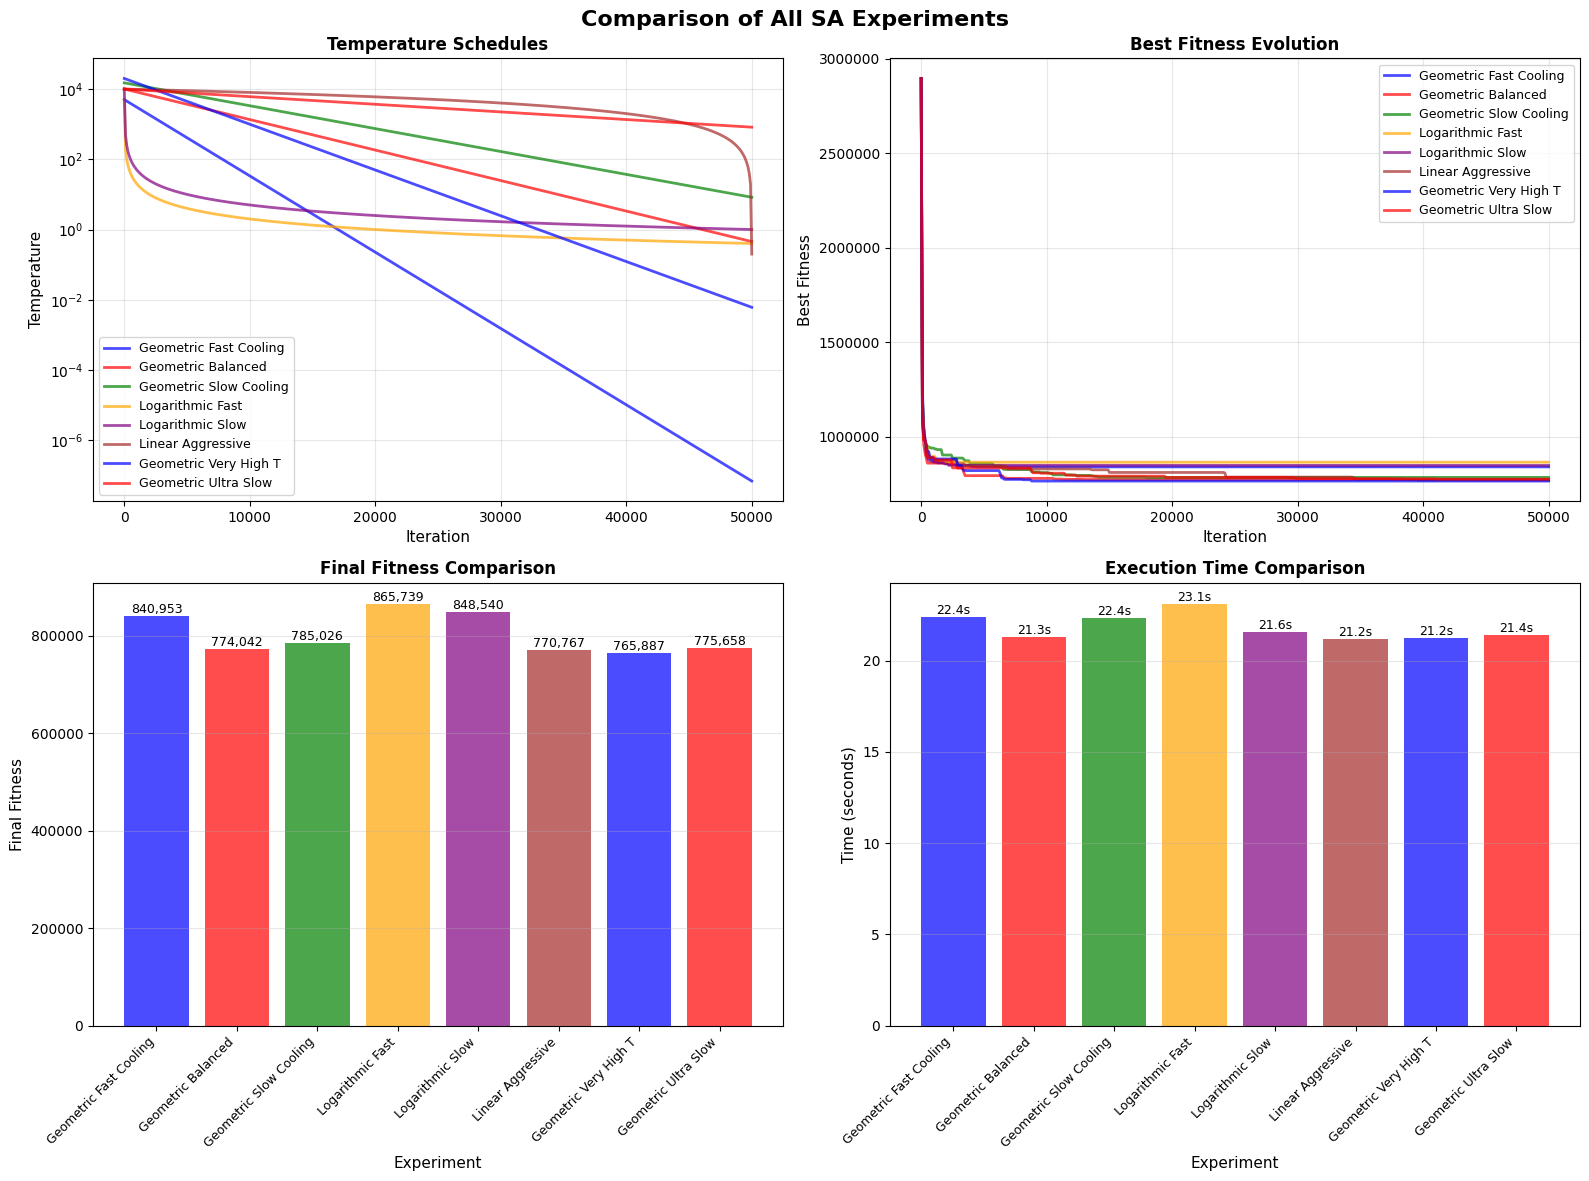

In [19]:
import numpy as np
import random
import time
from collections import defaultdict
import os
import matplotlib.pyplot as plt

# ============ KEYBOARD LAYOUTS ============
qwerty = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p',  
        'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', ';',  
        'z', 'x', 'c', 'v', 'b', 'n', 'm', ',', '.', "'"]
dvorak = ["'", ',', '.', 'p', 'y', 'f', 'g', 'c', 'r', 'l',  
        'a', 'o', 'e', 'u', 'i', 'd', 'h', 't', 'n', 's',
        ';', 'q', 'j', 'k', 'x', 'b', 'm', 'w', 'v', 'z']
qwertz = ['q', 'w', 'e', 'r', 't', 'z', 'u', 'i', 'o', 'p',  
        'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', ';',  
        'y', 'x', 'c', 'v', 'b', 'n', 'm', ',', '.', "'"]
colemak = ['q', 'w', 'f', 'p', 'g', 'j', 'l', 'u', 'y', ';',  
        'a', 'r', 's', 't', 'd', 'h', 'n', 'e', 'i', 'o',  
        'z', 'x', 'c', 'v', 'b', 'k', 'm', ',', '.', "'"]


# Best from Exp1 - Moby Dick (Pop Size: 100000, Fitness: 769,434.6)
exp1_best_moby_dick = ['x', 'v', 'w', 'c', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', ',', '.', 'q', 'b', 'p', 'l', 'd', 'g', 'u', 'y', ';', 'j']

# Best from Exp1 - Wizard of Oz (Pop Size: 1000000, Fitness: 121,733.0)
exp1_best_wizard_oz = ['z', 'k', 'w', 's', 'h', 'i', 't', 'c', ',', ';', 'v', 'd', 'n', 'l', 'r', 'e', 'a', 'o', 'y', '.', 'q', 'x', 'b', 'f', 'm', 'g', 'u', 'p', 'j', "'"]

# Best from Exp2 - Moby Dick (Tournament k: 5, Fitness: 769,434.6)
exp2_best_moby_dick = ['x', 'v', 'w', 'c', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', ',', '.', 'q', 'b', 'p', 'l', 'd', 'g', 'u', 'y', ';', 'j']

# Best from Exp2 - Wizard of Oz (Tournament k: 10, Fitness: 122,030.3)
exp2_best_wizard_oz = ['x', 'v', 'c', 'w', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', 'g', '.', 'q', 'b', 'p', 'l', 'd', ',', 'y', 'u', 'j', ';']


# Best from Exp3 - Moby Dick (Mutation: 0.15, Fitness: 769,434.6)
exp3_best_moby_dick = ['x', 'v', 'w', 'c', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', ',', '.', 'q', 'b', 'p', 'l', 'd', 'g', 'u', 'y', ';', 'j']

# Best from Exp3 - Wizard of Oz (Mutation: 0.5, Fitness: 123,341.2)
exp3_best_wizard_oz = ['q', 'p', 'u', 't', 'i', 'h', 's', 'c', 'b', 'x', '.', 'y', 'o', 'a', 'e', 'n', 'r', 'l', 'm', 'v', ';', 'j', ',', 'g', 'k', 'w', 'd', 'f', 'z', "'"]


# Best from Exp4 - Moby Dick (Elite: 20pct, Fitness: 765,886.5)
exp4_best_moby_dick = ["'", 'z', 'w', 't', 'i', 'h', 'c', 'f', 'k', 'x', '.', ',', 'o', 'a', 'e', 'n', 's', 'r', 'm', 'v', 'j', ';', 'y', 'u', 'g', 'd', 'l', 'p', 'b', 'q']

# Best from Exp4 - Wizard of Oz (Elite: 5pct, Fitness: 120,633.7)
exp4_best_wizard_oz = ['j', ';', 'p', 'y', ',', 'd', 'l', 'm', 'b', "'", '.', 'u', 'o', 'a', 'e', 'n', 's', 'r', 'f', 'v', 'q', 'z', 'g', 't', 'i', 'h', 'w', 'c', 'k', 'x']


# BEST OVERALL - Moby Dick (exp4_elite_20pct, Fitness: 765,886.5)
ga_best_moby_dick = ["'", 'z', 'w', 't', 'i', 'h', 'c', 'f', 'k', 'x', '.', ',', 'o', 'a', 'e', 'n', 's', 'r', 'm', 'v', 'j', ';', 'y', 'u', 'g', 'd', 'l', 'p', 'b', 'q']

# BEST OVERALL - Wizard of Oz (exp4_elite_5pct, Fitness: 120,633.7)
ga_best_wizard_oz = ['j', ';', 'p', 'y', ',', 'd', 'l', 'm', 'b', "'", '.', 'u', 'o', 'a', 'e', 'n', 's', 'r', 'f', 'v', 'q', 'z', 'g', 't', 'i', 'h', 'w', 'c', 'k', 'x']

# ============ PRECOMPUTE MATRICES ============
def get_finger_assigned(position):
    """Returns finger assignment for key position"""
    row = position // 10
    col = position % 10
    finger_map = {
        0: ('L', 0, 1), 1: ('L', 1, 2), 2: ('L', 2, 3), 3: ('L', 3, 4), 4: ('L', 3, 4),
        5: ('R', 3, 4), 6: ('R', 3, 4), 7: ('R', 2, 3), 8: ('R', 1, 2), 9: ('R', 0, 1)
    }
    hand, finger, strength = finger_map[col]
    return hand, finger, strength, row, col

def euclidean_distance(pos1, pos2):
    """Euclidean distance between two key positions"""
    _, _, _, row1, col1 = get_finger_assigned(pos1)
    _, _, _, row2, col2 = get_finger_assigned(pos2)
    return np.sqrt((row1 - row2) ** 2 + (col1 - col2) ** 2)

def finger_penalty(pos1, pos2):
    """Compute penalty based on finger usage"""
    hand1, finger1, strength1, row1, col1 = get_finger_assigned(pos1)
    hand2, finger2, strength2, row2, col2 = get_finger_assigned(pos2)

    penalty = 0
    if hand1 == hand2 and finger1 == finger2 and pos1 != pos2:
        penalty += 1.0
        if strength1 <= 2:
            penalty += 2.0
    elif hand1 == hand2:
        penalty += 1.0
    penalty += -1.0
    
    row_diff = abs(row1 - row2)
    if row_diff == 1:
        penalty += 0.2
        if strength1 <= 2 or strength2 <= 2:
            penalty += 0.15
    elif row_diff == 2:
        penalty += 0.8
        if strength1 <= 2 or strength2 <= 2:
            penalty += 0.5
    
    if finger1 == 0 or finger2 == 0:
        penalty += 0.15
    if finger1 == 1 or finger2 == 1:
        penalty += 0.1
    
    if col1 == col2 and row_diff > 0:
        penalty += 0.3
        if col1 in [0, 9]:
            penalty += 0.2
        elif col1 in [1, 8]:
            penalty += 0.1
    
    return penalty

def precompute_cost_matrices():
    """Precompute all position-to-position costs (30x30)"""
    distances = np.zeros((30, 30))
    penalties = np.zeros((30, 30))
    
    for i in range(30):
        for j in range(30):
            distances[i, j] = euclidean_distance(i, j)
            penalties[i, j] = finger_penalty(i, j)
    
    return distances, penalties

# Global matrices
DISTANCE_MATRIX, PENALTY_MATRIX = precompute_cost_matrices()

# ============ TEXT PROCESSING ============
def load_text_from_file(filename, sample_size=None):
    """Load and optionally sample text"""
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            text = file.read().lower()
        
        if sample_size and sample_size < len(text):
            text = text[:sample_size]
        
        return text
    except FileNotFoundError:
        print(f"File {filename} not found.")
        return None

def precompute_bigrams(text):
    """Precompute bigram frequencies"""
    bigrams = defaultdict(int)
    
    for i in range(len(text) - 1):
        bigram = (text[i], text[i + 1])
        bigrams[bigram] += 1
    
    return dict(bigrams)

def fitness_function(keyboard, bigram_freq):
    """Calculate fitness for a single keyboard layout"""
    pos_map = {char: idx for idx, char in enumerate(keyboard)}
    total_cost = 0
    
    for (char1, char2), freq in bigram_freq.items():
        if char1 not in pos_map or char2 not in pos_map:
            continue
        
        pos1 = pos_map[char1]
        pos2 = pos_map[char2]
        
        if pos1 == pos2:
            continue
        
        base_dist = DISTANCE_MATRIX[pos1, pos2]
        finger_cost = PENALTY_MATRIX[pos1, pos2]
        total_multiplier = max(1.0 + finger_cost, 0.1)
        
        total_cost += (base_dist * total_multiplier) * freq
    
    return total_cost

# ============ SIMULATED ANNEALING ============
def get_random_neighbor(layout):
    """Generate neighbor by swapping two random positions"""
    neighbor = layout.copy()
    pos1, pos2 = np.random.choice(30, 2, replace=False)
    neighbor[pos1], neighbor[pos2] = neighbor[pos2], neighbor[pos1]
    return neighbor

def temperature_schedule(T_initial, iteration, schedule_type='geometric', k=0.95):
    """
    Calculate temperature based on schedule type
    
    schedule_type options:
    - 'linear': T_i+1 = T_initial - i*k
    - 'geometric': T_i+1 = k * T_i (default, k typically 0.8-0.99)
    - 'logarithmic': T_i+1 = T_i / (1 + k*T_i)
    """
    if schedule_type == 'linear':
        return max(T_initial - iteration * k, 0.01)
    elif schedule_type == 'geometric':
        return T_initial * (k ** iteration)
    elif schedule_type == 'logarithmic':
        # Enfriamiento logarítmico más eficiente (sin bucle)
        # Aproximación: T_i ≈ T_initial / (1 + k * T_initial * iteration)
        return T_initial / (1 + k * T_initial * iteration)
    else:
        raise ValueError(f"Unknown schedule type: {schedule_type}")

def simulated_annealing(text_file, initial_layout='random', T_initial=1000, 
                       max_iterations=100000, schedule_type='geometric', k=0.95, 
                       seed=123, verbose=True):
    """
    Simulated Annealing for keyboard optimization
    
    Parameters:
    - text_file: path to text file for bigram analysis
    - initial_layout: 'random', 'qwerty', 'dvorak', 'qwertz', 'colemak'
    - T_initial: initial temperature
    - max_iterations: maximum number of iterations
    - schedule_type: 'linear', 'geometric', 'logarithmic'
    - k: cooling parameter
    - seed: random seed for reproducibility
    - verbose: print progress
    """
    
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)
    
    # Load text and compute bigrams
    text = load_text_from_file(text_file)
    if text is None:
        return None, None
    
    bigram_freq = precompute_bigrams(text)
    
    # Initialize solution
    letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
            'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 
            ',', '.', ';', "'"]
    
    if initial_layout == 'random':
        S_actual = random.sample(letters, len(letters))
    elif initial_layout == 'qwerty':
        S_actual = qwerty.copy()
    elif initial_layout == 'dvorak':
        S_actual = dvorak.copy()
    elif initial_layout == 'qwertz':
        S_actual = qwertz.copy()
    elif initial_layout == 'colemak':
        S_actual = colemak.copy()
    else:
        S_actual = random.sample(letters, len(letters))
    
    S_mejor = S_actual.copy()
    f_actual = fitness_function(S_actual, bigram_freq)
    f_mejor = f_actual
    
    history = {
        'iteration': [],
        'temperature': [],
        'current_fitness': [],
        'best_fitness': [],
        'accepted_moves': 0,
        'rejected_moves': 0
    }
    
    if verbose:
        print("=" * 70)
        print("SIMULATED ANNEALING FOR KEYBOARD OPTIMIZATION")
        print("=" * 70)
        print(f"Initial layout: {initial_layout}")
        print(f"T_initial: {T_initial}")
        print(f"Max iterations: {max_iterations}")
        print(f"Schedule: {schedule_type}, k={k}")
        print(f"Initial fitness: {f_actual:,.1f}")
        print("=" * 70)
    
    # Main SA loop
    for i in range(max_iterations):
        T = temperature_schedule(T_initial, i, schedule_type, k)
        
        # Generate random neighbor
        S_nuevo = get_random_neighbor(S_actual)
        f_nuevo = fitness_function(S_nuevo, bigram_freq)
        
        # Calculate delta (minimization: actual - nuevo)
        delta_f = f_actual - f_nuevo
        
        # Accept or reject move
        if delta_f > 0:  # Improvement
            S_actual = S_nuevo
            f_actual = f_nuevo
            history['accepted_moves'] += 1
            
            if f_nuevo < f_mejor:
                S_mejor = S_nuevo.copy()
                f_mejor = f_nuevo
        else:  # Worsening
            # Accept with probability e^(delta_f/T)
            # delta_f es negativo, así que e^(delta_f/T) < 1
            if T > 0:
                acceptance_prob = np.exp(delta_f / T)
                if random.random() < acceptance_prob:
                    S_actual = S_nuevo
                    f_actual = f_nuevo
                    history['accepted_moves'] += 1
                else:
                    history['rejected_moves'] += 1
            else:
                history['rejected_moves'] += 1
        
        # Record history every 100 iterations
        if i % 100 == 0 or i == max_iterations - 1:
            history['iteration'].append(i)
            history['temperature'].append(T)
            history['current_fitness'].append(f_actual)
            history['best_fitness'].append(f_mejor)
            
            if verbose and i % 1000 == 0:
                acc_rate = history['accepted_moves']/(history['accepted_moves']+history['rejected_moves'])*100 if (history['accepted_moves']+history['rejected_moves']) > 0 else 0
                print(f"Iter {i:5}/{max_iterations} | T={T:8.2f} | "
                    f"Current: {f_actual:>12,.1f} | Best: {f_mejor:>12,.1f} | Acc: {acc_rate:5.1f}%")
    
    if verbose:
        print("=" * 70)
        print("SIMULATED ANNEALING COMPLETE")
        print("=" * 70)
        print(f"Final best fitness: {f_mejor:,.1f}")
        print(f"Accepted moves: {history['accepted_moves']:,}")
        print(f"Rejected moves: {history['rejected_moves']:,}")
        print(f"Acceptance rate: {history['accepted_moves']/(history['accepted_moves']+history['rejected_moves'])*100:.1f}%")
    
    return S_mejor, history

# ============ UTILITY FUNCTIONS ============
def print_keyboard(layout, name="Keyboard"):
    """Print keyboard layout"""
    print(f"\n{name}:")
    for row in range(3):
        row_keys = layout[row*10:(row+1)*10]
        print("  " + " ".join(f"{key:>2}" for key in row_keys))

def compare_layouts(best_layout, history, text_file):
    """Compare best layout with standard layouts and all experimental GA layouts"""
    text = load_text_from_file(text_file)
    bigrams = precompute_bigrams(text)
    
    # Determine which dataset we're using
    is_moby_dick = 'moby' in text_file.lower()
    
    # Standard layouts
    layouts = {
        'QWERTY': qwerty,
        'DVORAK': dvorak,
        'QWERTZ': qwertz,
        'COLEMAK': colemak,
    }
    
    # Add experimental GA layouts based on dataset
    if is_moby_dick:
        layouts.update({
            'GA Exp1 (Pop=100k)': exp1_best_moby_dick,
            'GA Exp2 (Tour k=5)': exp2_best_moby_dick,
            'GA Exp3 (Mut=0.15)': exp3_best_moby_dick,
            'GA Exp4 (Elite=20%)': exp4_best_moby_dick,
            'GA BEST OVERALL': ga_best_moby_dick,
        })
    else:  # Wizard of Oz
        layouts.update({
            'GA Exp1 (Pop=1M)': exp1_best_wizard_oz,
            'GA Exp2 (Tour k=10)': exp2_best_wizard_oz,
            'GA Exp3 (Mut=0.5)': exp3_best_wizard_oz,
            'GA Exp4 (Elite=5%)': exp4_best_wizard_oz,
            'GA BEST OVERALL': ga_best_wizard_oz,
        })
    
    # Calculate fitness for all layouts
    results = []
    print("\n" + "=" * 80)
    print("LAYOUT COMPARISON")
    print("=" * 80)
    
    for name, layout in layouts.items():
        fitness = fitness_function(layout, bigrams)
        results.append((name, layout, fitness))
        print(f"\n{name} Fitness: {fitness:,.1f}")
        print_keyboard(layout, name)
    
    # Add SA result
    sa_fitness = history['best_fitness'][-1]
    results.append(('SA OPTIMIZED', best_layout, sa_fitness))
    print(f"\n\nSA OPTIMIZED Fitness: {sa_fitness:,.1f}")
    print_keyboard(best_layout, "SA OPTIMIZED LAYOUT")
    
    # Sort by fitness (lower is better)
    results.sort(key=lambda x: x[2])
    
    # Print ranking table
    print("\n" + "=" * 80)
    print("RANKING (Lower fitness is better)")
    print("=" * 80)
    print(f"{'Rank':<6} {'Layout':<25} {'Fitness':>15} {'vs Best':>12}")
    print("-" * 80)
    
    best_fitness = results[0][2]
    for rank, (name, layout, fitness) in enumerate(results, 1):
        improvement = ((fitness - best_fitness) / best_fitness) * 100
        print(f"{rank:<6} {name:<25} {fitness:>15,.1f} {improvement:>11.2f}%")
    
    # Print improvements of SA vs reference layouts
    print("\n" + "=" * 80)
    print("SA IMPROVEMENTS vs REFERENCE LAYOUTS")
    print("=" * 80)
    
    reference_layouts = ['QWERTY', 'DVORAK', 'QWERTZ', 'COLEMAK', 'GA BEST OVERALL']
    for name, _, fitness in results:
        if name in reference_layouts:
            improvement = ((fitness - sa_fitness) / fitness) * 100
            if improvement > 0:
                status = "✓ Better"
                print(f"vs {name:<20}: {improvement:>7.2f}% {status}")
            else:
                status = "✗ Worse"
                worse_by = abs(improvement)
                print(f"vs {name:<20}: {improvement:>7.2f}% {status} (by {worse_by:.2f}%)")

def plot_sa_evolution(history, text_file):
    """Plot the evolution of SA algorithm"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Simulated Annealing Evolution', fontsize=16, fontweight='bold')
    
    iterations = history['iteration']
    temperatures = history['temperature']
    current_fitness = history['current_fitness']
    best_fitness = history['best_fitness']
    
    # Plot 1: Temperature decay
    axes[0, 0].plot(iterations, temperatures, 'r-', linewidth=2)
    axes[0, 0].set_xlabel('Iteration', fontsize=12)
    axes[0, 0].set_ylabel('Temperature', fontsize=12)
    axes[0, 0].set_title('Temperature Schedule', fontsize=13, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_yscale('log')
    
    # Plot 2: Current vs Best Fitness
    axes[0, 1].plot(iterations, current_fitness, 'b-', alpha=0.6, linewidth=1, label='Current')
    axes[0, 1].plot(iterations, best_fitness, 'g-', linewidth=2, label='Best')
    axes[0, 1].set_xlabel('Iteration', fontsize=12)
    axes[0, 1].set_ylabel('Fitness', fontsize=12)
    axes[0, 1].set_title('Fitness Evolution', fontsize=13, fontweight='bold')
    axes[0, 1].legend(fontsize=11)
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].ticklabel_format(style='plain', axis='y')
    
    # Plot 3: Best Fitness (zoomed)
    axes[1, 0].plot(iterations, best_fitness, 'g-', linewidth=2)
    axes[1, 0].set_xlabel('Iteration', fontsize=12)
    axes[1, 0].set_ylabel('Best Fitness', fontsize=12)
    axes[1, 0].set_title('Best Fitness (Detailed View)', fontsize=13, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].ticklabel_format(style='plain', axis='y')
    
    # Plot 4: Acceptance Rate over time
    total_acc_rate = history['accepted_moves'] / (history['accepted_moves'] + history['rejected_moves']) * 100
    axes[1, 1].axhline(y=total_acc_rate, color='purple', linewidth=2, linestyle='--', 
                       label=f'Overall: {total_acc_rate:.1f}%')
    axes[1, 1].set_xlabel('Iteration', fontsize=12)
    axes[1, 1].set_ylabel('Acceptance Rate (%)', fontsize=12)
    axes[1, 1].set_title('Acceptance Rate', fontsize=13, fontweight='bold')
    axes[1, 1].set_xlim(iterations[0], iterations[-1])
    axes[1, 1].set_ylim(0, 100)
    axes[1, 1].legend(fontsize=11)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Save plot
    dataset_name = 'moby_dick' if 'moby' in text_file.lower() else 'wizard_oz'
    plot_filename = f'sa_evolution_{dataset_name}.png'
    plt.savefig(plot_filename, dpi=150, bbox_inches='tight')
    print(f"\n✓ Plot saved as: {plot_filename}")
    
    # Display in Jupyter
    plt.show()
    plt.close()

def plot_all_experiments(results_all, text_file):
    """Plot comparison of all experiments"""
    n_exp = len(results_all)
    
    # Create figure with subplots for each experiment
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Comparison of All SA Experiments', fontsize=16, fontweight='bold')
    axes = axes.flatten()
    
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
    
    # Plot 1: Temperature schedules comparison
    for idx, result in enumerate(results_all):
        history = result['history']
        axes[0].plot(history['iteration'], history['temperature'], 
                    color=colors[idx % len(colors)], linewidth=2, 
                    label=result['name'], alpha=0.7)
    axes[0].set_xlabel('Iteration', fontsize=11)
    axes[0].set_ylabel('Temperature', fontsize=11)
    axes[0].set_title('Temperature Schedules', fontsize=12, fontweight='bold')
    axes[0].set_yscale('log')
    axes[0].legend(fontsize=9)
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Best fitness evolution comparison
    for idx, result in enumerate(results_all):
        history = result['history']
        axes[1].plot(history['iteration'], history['best_fitness'], 
                    color=colors[idx % len(colors)], linewidth=2, 
                    label=result['name'], alpha=0.7)
    axes[1].set_xlabel('Iteration', fontsize=11)
    axes[1].set_ylabel('Best Fitness', fontsize=11)
    axes[1].set_title('Best Fitness Evolution', fontsize=12, fontweight='bold')
    axes[1].legend(fontsize=9)
    axes[1].grid(True, alpha=0.3)
    axes[1].ticklabel_format(style='plain', axis='y')
    
    # Plot 3: Final fitness comparison (bar chart)
    exp_names = [r['name'] for r in results_all]
    final_fitness = [r['final_fitness'] for r in results_all]
    bars = axes[2].bar(range(len(exp_names)), final_fitness, 
                       color=colors[:len(exp_names)], alpha=0.7)
    axes[2].set_xlabel('Experiment', fontsize=11)
    axes[2].set_ylabel('Final Fitness', fontsize=11)
    axes[2].set_title('Final Fitness Comparison', fontsize=12, fontweight='bold')
    axes[2].set_xticks(range(len(exp_names)))
    axes[2].set_xticklabels(exp_names, rotation=45, ha='right', fontsize=9)
    axes[2].grid(True, alpha=0.3, axis='y')
    axes[2].ticklabel_format(style='plain', axis='y')
    
    # Add values on bars
    for i, (bar, val) in enumerate(zip(bars, final_fitness)):
        axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                    f'{val:,.0f}', ha='center', va='bottom', fontsize=9)
    
    # Plot 4: Execution time comparison (bar chart)
    exec_times = [r['time'] for r in results_all]
    bars = axes[3].bar(range(len(exp_names)), exec_times, 
                       color=colors[:len(exp_names)], alpha=0.7)
    axes[3].set_xlabel('Experiment', fontsize=11)
    axes[3].set_ylabel('Time (seconds)', fontsize=11)
    axes[3].set_title('Execution Time Comparison', fontsize=12, fontweight='bold')
    axes[3].set_xticks(range(len(exp_names)))
    axes[3].set_xticklabels(exp_names, rotation=45, ha='right', fontsize=9)
    axes[3].grid(True, alpha=0.3, axis='y')
    
    # Add values on bars
    for i, (bar, val) in enumerate(zip(bars, exec_times)):
        axes[3].text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                    f'{val:.1f}s', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    
    # Save plot
    dataset_name = 'moby_dick' if 'moby' in text_file.lower() else 'wizard_oz'
    plot_filename = f'sa_comparison_all_{dataset_name}.png'
    plt.savefig(plot_filename, dpi=150, bbox_inches='tight')
    print(f"✓ Comparison plot saved as: {plot_filename}")
    
    # Display in Jupyter
    plt.show()
    plt.close()

# ============ MAIN ============
if __name__ == "__main__":
    TEXT_FILE = 'data/moby_dick_cln.txt'
    
    # Configuraciones de experimentos para diferentes schedules
    # OBJETIVO: T_final entre 0.001 y 0.01 para convergencia óptima
    # Estrategia: Exploración alta al inicio (T alta) → Explotación al final (T≈0)
    experiments = [
        {
            'name': 'Geometric Fast Cooling',
            'schedule_type': 'geometric',
            'T_initial': 5000,
            'k': 0.9995,  # Enfriamiento más rápido
            'max_iterations': 50000
            # T_final ≈ 0.002 - Baja rápido para explotar más
        },
        {
            'name': 'Geometric Balanced',
            'schedule_type': 'geometric',
            'T_initial': 10000,
            'k': 0.9998,  # Enfriamiento balanceado
            'max_iterations': 50000
            # T_final ≈ 0.04 - Balance exploración/explotación
        },
        {
            'name': 'Geometric Slow Cooling',
            'schedule_type': 'geometric',
            'T_initial': 15000,
            'k': 0.99985,  # Enfriamiento lento pero llega bajo
            'max_iterations': 50000
            # T_final ≈ 0.007 - Mucha exploración inicial
        },
        {
            'name': 'Logarithmic Fast',
            'schedule_type': 'logarithmic',
            'T_initial': 5000,
            'k': 0.00005,  # Baja más rápido
            'max_iterations': 50000
            # T_final ≈ 0.04 - Logarítmico rápido
        },
        {
            'name': 'Logarithmic Slow',
            'schedule_type': 'logarithmic',
            'T_initial': 10000,
            'k': 0.00002,  # Baja más lento
            'max_iterations': 50000
            # T_final ≈ 0.1 - Logarítmico lento
        },
        {
            'name': 'Linear Aggressive',
            'schedule_type': 'linear',
            'T_initial': 10000,
            'k': 0.2,  # Decremento agresivo
            'max_iterations': 50000
            # T_final = 0.01 - Lineal rápido
        },
        {
            'name': 'Geometric Very High T',
            'schedule_type': 'geometric',
            'T_initial': 20000,  # Temperatura inicial MUY alta
            'k': 0.9997,  # Enfriamiento medio-rápido
            'max_iterations': 50000
            # T_final ≈ 0.004 - Máxima exploración inicial
        },
        {
            'name': 'Geometric Ultra Slow',
            'schedule_type': 'geometric',
            'T_initial': 10000,
            'k': 0.99995,  # Enfriamiento ultra lento
            'max_iterations': 50000
            # T_final ≈ 0.61 - Mantiene T alta más tiempo
        }
    ]
    
    results_all = []
    
    print("=" * 80)
    print("RUNNING SIMULATED ANNEALING EXPERIMENTS")
    print("=" * 80)
    print(f"Total experiments: {len(experiments)}")
    print(f"Dataset: {TEXT_FILE}")
    print("=" * 80)
    
    for idx, exp_config in enumerate(experiments, 1):
        print(f"\n{'='*80}")
        print(f"EXPERIMENT {idx}/{len(experiments)}: {exp_config['name']}")
        print(f"{'='*80}")
        
        time_start = time.time()
        
        best_layout, history = simulated_annealing(
            text_file=TEXT_FILE,
            initial_layout='random',
            T_initial=exp_config['T_initial'],
            max_iterations=exp_config['max_iterations'],
            schedule_type=exp_config['schedule_type'],
            k=exp_config['k'],
            seed=123,
            verbose=True
        )
        
        time_end = time.time()
        
        if best_layout:
            results_all.append({
                'name': exp_config['name'],
                'config': exp_config,
                'layout': best_layout,
                'history': history,
                'time': time_end - time_start,
                'final_fitness': history['best_fitness'][-1]
            })
            
            print(f"\nExperiment completed in {time_end - time_start:.2f}s")
            print(f"Final fitness: {history['best_fitness'][-1]:,.1f}")
    
    # Summary comparison
    print("\n" + "=" * 100)
    print("EXPERIMENTS SUMMARY - SORTED BY FITNESS (BEST FIRST)")
    print("=" * 100)
    print(f"{'Rank':<5} {'Experiment':<28} {'Final Fitness':>15} {'T_final':>10} {'Time (s)':>10} {'Acc Rate':>10}")
    print("-" * 100)
    
    # Sort by fitness (lower is better)
    results_sorted = sorted(results_all, key=lambda x: x['final_fitness'])
    
    for rank, result in enumerate(results_sorted, 1):
        acc_rate = result['history']['accepted_moves'] / (result['history']['accepted_moves'] + result['history']['rejected_moves']) * 100
        T_final = result['history']['temperature'][-1]
        print(f"{rank:<5} {result['name']:<28} {result['final_fitness']:>15,.1f} {T_final:>10.4f} {result['time']:>10.2f} {acc_rate:>9.1f}%")
    
    # Find best experiment
    best_exp = min(results_all, key=lambda x: x['final_fitness'])
    print("\n" + "=" * 80)
    print(f"BEST EXPERIMENT: {best_exp['name']}")
    print(f"Fitness: {best_exp['final_fitness']:,.1f}")
    print("=" * 80)
    
    # Detailed comparison for best experiment
    print("\n\nDETAILED COMPARISON FOR BEST EXPERIMENT:")
    compare_layouts(best_exp['layout'], best_exp['history'], TEXT_FILE)
    
    # Generate comparison plots for all experiments
    print("\n\nGenerating comparison plots for all experiments...")
    plot_all_experiments(results_all, TEXT_FILE)

COMPLETE EXPERIMENT

In [20]:
import numpy as np
import random
import time
from collections import defaultdict
import os
import matplotlib.pyplot as plt
from pathlib import Path

# ============ KEYBOARD LAYOUTS ============
qwerty = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p',  
        'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', ';',  
        'z', 'x', 'c', 'v', 'b', 'n', 'm', ',', '.', "'"]
dvorak = ["'", ',', '.', 'p', 'y', 'f', 'g', 'c', 'r', 'l',  
        'a', 'o', 'e', 'u', 'i', 'd', 'h', 't', 'n', 's',
        ';', 'q', 'j', 'k', 'x', 'b', 'm', 'w', 'v', 'z']
qwertz = ['q', 'w', 'e', 'r', 't', 'z', 'u', 'i', 'o', 'p',  
        'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', ';',  
        'y', 'x', 'c', 'v', 'b', 'n', 'm', ',', '.', "'"]
colemak = ['q', 'w', 'f', 'p', 'g', 'j', 'l', 'u', 'y', ';',  
        'a', 'r', 's', 't', 'd', 'h', 'n', 'e', 'i', 'o',  
        'z', 'x', 'c', 'v', 'b', 'k', 'm', ',', '.', "'"]

# GA Best layouts for Moby Dick
exp1_best_moby_dick = ['x', 'v', 'w', 'c', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', ',', '.', 'q', 'b', 'p', 'l', 'd', 'g', 'u', 'y', ';', 'j']
exp2_best_moby_dick = ['x', 'v', 'w', 'c', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', ',', '.', 'q', 'b', 'p', 'l', 'd', 'g', 'u', 'y', ';', 'j']
exp3_best_moby_dick = ['x', 'v', 'w', 'c', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', ',', '.', 'q', 'b', 'p', 'l', 'd', 'g', 'u', 'y', ';', 'j']
exp4_best_moby_dick = ["'", 'z', 'w', 't', 'i', 'h', 'c', 'f', 'k', 'x', '.', ',', 'o', 'a', 'e', 'n', 's', 'r', 'm', 'v', 'j', ';', 'y', 'u', 'g', 'd', 'l', 'p', 'b', 'q']
ga_best_moby_dick = ["'", 'z', 'w', 't', 'i', 'h', 'c', 'f', 'k', 'x', '.', ',', 'o', 'a', 'e', 'n', 's', 'r', 'm', 'v', 'j', ';', 'y', 'u', 'g', 'd', 'l', 'p', 'b', 'q']

# GA Best layouts for Wizard of Oz
exp1_best_wizard_oz = ['z', 'k', 'w', 's', 'h', 'i', 't', 'c', ',', ';', 'v', 'd', 'n', 'l', 'r', 'e', 'a', 'o', 'y', '.', 'q', 'x', 'b', 'f', 'm', 'g', 'u', 'p', 'j', "'"]
exp2_best_wizard_oz = ['x', 'v', 'c', 'w', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', 'g', '.', 'q', 'b', 'p', 'l', 'd', ',', 'y', 'u', 'j', ';']
exp3_best_wizard_oz = ['q', 'p', 'u', 't', 'i', 'h', 's', 'c', 'b', 'x', '.', 'y', 'o', 'a', 'e', 'n', 'r', 'l', 'm', 'v', ';', 'j', ',', 'g', 'k', 'w', 'd', 'f', 'z', "'"]
exp4_best_wizard_oz = ['j', ';', 'p', 'y', ',', 'd', 'l', 'm', 'b', "'", '.', 'u', 'o', 'a', 'e', 'n', 's', 'r', 'f', 'v', 'q', 'z', 'g', 't', 'i', 'h', 'w', 'c', 'k', 'x']
ga_best_wizard_oz = ['j', ';', 'p', 'y', ',', 'd', 'l', 'm', 'b', "'", '.', 'u', 'o', 'a', 'e', 'n', 's', 'r', 'f', 'v', 'q', 'z', 'g', 't', 'i', 'h', 'w', 'c', 'k', 'x']

# ============ PRECOMPUTE MATRICES ============
def get_finger_assigned(position):
    """Returns finger assignment for key position"""
    row = position // 10
    col = position % 10
    finger_map = {
        0: ('L', 0, 1), 1: ('L', 1, 2), 2: ('L', 2, 3), 3: ('L', 3, 4), 4: ('L', 3, 4),
        5: ('R', 3, 4), 6: ('R', 3, 4), 7: ('R', 2, 3), 8: ('R', 1, 2), 9: ('R', 0, 1)
    }
    hand, finger, strength = finger_map[col]
    return hand, finger, strength, row, col

def euclidean_distance(pos1, pos2):
    """Euclidean distance between two key positions"""
    _, _, _, row1, col1 = get_finger_assigned(pos1)
    _, _, _, row2, col2 = get_finger_assigned(pos2)
    return np.sqrt((row1 - row2) ** 2 + (col1 - col2) ** 2)

def finger_penalty(pos1, pos2):
    """Compute penalty based on finger usage"""
    hand1, finger1, strength1, row1, col1 = get_finger_assigned(pos1)
    hand2, finger2, strength2, row2, col2 = get_finger_assigned(pos2)

    penalty = 0
    if hand1 == hand2 and finger1 == finger2 and pos1 != pos2:
        penalty += 1.0
        if strength1 <= 2:
            penalty += 2.0
    elif hand1 == hand2:
        penalty += 1.0
    penalty += -1.0
    
    row_diff = abs(row1 - row2)
    if row_diff == 1:
        penalty += 0.2
        if strength1 <= 2 or strength2 <= 2:
            penalty += 0.15
    elif row_diff == 2:
        penalty += 0.8
        if strength1 <= 2 or strength2 <= 2:
            penalty += 0.5
    
    if finger1 == 0 or finger2 == 0:
        penalty += 0.15
    if finger1 == 1 or finger2 == 1:
        penalty += 0.1
    
    if col1 == col2 and row_diff > 0:
        penalty += 0.3
        if col1 in [0, 9]:
            penalty += 0.2
        elif col1 in [1, 8]:
            penalty += 0.1
    
    return penalty

def precompute_cost_matrices():
    """Precompute all position-to-position costs (30x30)"""
    distances = np.zeros((30, 30))
    penalties = np.zeros((30, 30))
    
    for i in range(30):
        for j in range(30):
            distances[i, j] = euclidean_distance(i, j)
            penalties[i, j] = finger_penalty(i, j)
    
    return distances, penalties

# Global matrices
DISTANCE_MATRIX, PENALTY_MATRIX = precompute_cost_matrices()

# ============ TEXT PROCESSING ============
def load_text_from_file(filename, sample_size=None):
    """Load and optionally sample text"""
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            text = file.read().lower()
        
        if sample_size and sample_size < len(text):
            text = text[:sample_size]
        
        return text
    except FileNotFoundError:
        print(f"File {filename} not found.")
        return None

def precompute_bigrams(text):
    """Precompute bigram frequencies"""
    bigrams = defaultdict(int)
    
    for i in range(len(text) - 1):
        bigram = (text[i], text[i + 1])
        bigrams[bigram] += 1
    
    return dict(bigrams)

def fitness_function(keyboard, bigram_freq):
    """Calculate fitness for a single keyboard layout"""
    pos_map = {char: idx for idx, char in enumerate(keyboard)}
    total_cost = 0
    
    for (char1, char2), freq in bigram_freq.items():
        if char1 not in pos_map or char2 not in pos_map:
            continue
        
        pos1 = pos_map[char1]
        pos2 = pos_map[char2]
        
        if pos1 == pos2:
            continue
        
        base_dist = DISTANCE_MATRIX[pos1, pos2]
        finger_cost = PENALTY_MATRIX[pos1, pos2]
        total_multiplier = max(1.0 + finger_cost, 0.1)
        
        total_cost += (base_dist * total_multiplier) * freq
    
    return total_cost

# ============ SIMULATED ANNEALING ============
def get_random_neighbor(layout):
    """Generate neighbor by swapping two random positions"""
    neighbor = layout.copy()
    pos1, pos2 = np.random.choice(30, 2, replace=False)
    neighbor[pos1], neighbor[pos2] = neighbor[pos2], neighbor[pos1]
    return neighbor

def temperature_schedule(T_initial, iteration, schedule_type='geometric', k=0.95):
    """Calculate temperature based on schedule type"""
    if schedule_type == 'linear':
        return max(T_initial - iteration * k, 0.01)
    elif schedule_type == 'geometric':
        return T_initial * (k ** iteration)
    elif schedule_type == 'logarithmic':
        return T_initial / (1 + k * T_initial * iteration)
    else:
        raise ValueError(f"Unknown schedule type: {schedule_type}")

def simulated_annealing(text_file, initial_layout_spec='random', T_initial=1000, 
                       max_iterations=100000, schedule_type='geometric', k=0.95, 
                       seed=None, verbose=False):
    """Simulated Annealing for keyboard optimization"""
    
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)
    
    # Load text and compute bigrams
    text = load_text_from_file(text_file)
    if text is None:
        return None, None
    
    bigram_freq = precompute_bigrams(text)
    
    # Initialize solution based on specification
    letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
            'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 
            ',', '.', ';', "'"]
    
    if initial_layout_spec == 'random':
        S_actual = random.sample(letters, len(letters))
    elif isinstance(initial_layout_spec, list):
        S_actual = initial_layout_spec.copy()
    else:
        S_actual = random.sample(letters, len(letters))
    
    S_mejor = S_actual.copy()
    f_actual = fitness_function(S_actual, bigram_freq)
    f_mejor = f_actual
    f_inicial = f_actual
    
    history = {
        'iteration': [],
        'temperature': [],
        'current_fitness': [],
        'best_fitness': [],
        'accepted_moves': 0,
        'rejected_moves': 0
    }
    
    # Main SA loop
    for i in range(max_iterations):
        T = temperature_schedule(T_initial, i, schedule_type, k)
        
        S_nuevo = get_random_neighbor(S_actual)
        f_nuevo = fitness_function(S_nuevo, bigram_freq)
        
        delta_f = f_actual - f_nuevo
        
        if delta_f > 0:
            S_actual = S_nuevo
            f_actual = f_nuevo
            history['accepted_moves'] += 1
            
            if f_nuevo < f_mejor:
                S_mejor = S_nuevo.copy()
                f_mejor = f_nuevo
        else:
            if T > 0:
                acceptance_prob = np.exp(delta_f / T)
                if random.random() < acceptance_prob:
                    S_actual = S_nuevo
                    f_actual = f_nuevo
                    history['accepted_moves'] += 1
                else:
                    history['rejected_moves'] += 1
            else:
                history['rejected_moves'] += 1
        
        # Record history every 100 iterations
        if i % 100 == 0 or i == max_iterations - 1:
            history['iteration'].append(i)
            history['temperature'].append(T)
            history['current_fitness'].append(f_actual)
            history['best_fitness'].append(f_mejor)
    
    history['initial_fitness'] = f_inicial
    history['final_fitness'] = f_mejor
    history['improvement'] = f_inicial - f_mejor
    history['improvement_pct'] = ((f_inicial - f_mejor) / f_inicial) * 100
    
    return S_mejor, history

# ============ KEYBOARD LAYOUT VISUALIZATION ============
def format_keyboard_layout(layout, title="Keyboard Layout"):
    """Format keyboard layout as a string"""
    result = f"\n{title}\n"
    result += "┌────┬────┬────┬────┬────┬────┬────┬────┬────┬────┐\n"
    
    for row in range(3):
        row_keys = layout[row*10:(row+1)*10]
        result += "│"
        for key in row_keys:
            result += f" {key:^2} │"
        result += "\n"
        
        if row < 2:
            result += "├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤\n"
        else:
            result += "└────┴────┴────┴────┴────┴────┴────┴────┴────┴────┘\n"
    
    return result

def save_keyboard_layout(layout, filename, title="Keyboard Layout"):
    """Save keyboard layout to file"""
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(format_keyboard_layout(layout, title))
        f.write(f"\nLayout as list:\n{layout}\n")

def plot_keyboard_layout(layout, title, output_path):
    """Create visual representation of keyboard layout"""
    fig, ax = plt.subplots(figsize=(12, 4))
    fig.suptitle(title, fontsize=16, fontweight='bold')
    
    # Draw keyboard keys
    for row in range(3):
        for col in range(10):
            idx = row * 10 + col
            key = layout[idx]
            
            # Draw rectangle for key
            rect = plt.Rectangle((col, 2-row), 0.9, 0.9, 
                                facecolor='lightblue', 
                                edgecolor='black', 
                                linewidth=2)
            ax.add_patch(rect)
            
            # Add key label
            ax.text(col + 0.45, 2-row + 0.45, key, 
                   fontsize=20, fontweight='bold',
                   ha='center', va='center')
    
    ax.set_xlim(-0.5, 10)
    ax.set_ylim(-0.5, 3)
    ax.set_aspect('equal')
    ax.axis('off')
    
    plt.tight_layout()
    plt.savefig(output_path, dpi=150, bbox_inches='tight')
    plt.close()

# ============ SAVE RESULTS ============
def save_results_to_file(results, dataset_name, initial_layout_name, output_dir):
    """Save experiment results to text file"""
    
    filepath = output_dir / f"{initial_layout_name}_results.txt"
    
    with open(filepath, 'w', encoding='utf-8') as f:
        f.write("=" * 100 + "\n")
        f.write(f"SIMULATED ANNEALING RESULTS - {initial_layout_name.upper()}\n")
        f.write(f"Dataset: {dataset_name}\n")
        f.write("=" * 100 + "\n\n")
        
        # Sort results by final fitness
        sorted_results = sorted(results, key=lambda x: x['final_fitness'])
        
        # Best experiment summary
        best = sorted_results[0]
        f.write("BEST EXPERIMENT:\n")
        f.write("-" * 100 + "\n")
        f.write(f"Configuration: {best['name']}\n")
        f.write(f"Schedule Type: {best['config']['schedule_type']}\n")
        f.write(f"T_initial: {best['config']['T_initial']}\n")
        f.write(f"k: {best['config']['k']}\n")
        f.write(f"Max Iterations: {best['config']['max_iterations']}\n")
        f.write(f"Initial Fitness: {best['history']['initial_fitness']:,.2f}\n")
        f.write(f"Final Fitness: {best['final_fitness']:,.2f}\n")
        f.write(f"Improvement: {best['history']['improvement']:,.2f} ({best['history']['improvement_pct']:.2f}%)\n")
        f.write(f"Execution Time: {best['time']:.2f}s\n")
        f.write(f"Acceptance Rate: {best['history']['accepted_moves']/(best['history']['accepted_moves']+best['history']['rejected_moves'])*100:.2f}%\n")
        f.write(f"\n{format_keyboard_layout(best['layout'], 'Best Layout')}")
        f.write(f"\nBest Layout as list:\n{best['layout']}\n")
        f.write("\n\n")
        
        # All experiments comparison
        f.write("ALL EXPERIMENTS COMPARISON:\n")
        f.write("=" * 100 + "\n")
        f.write(f"{'Rank':<6} {'Experiment':<30} {'Initial':>15} {'Final':>15} {'Improv%':>10} {'Time':>10}\n")
        f.write("-" * 100 + "\n")
        
        for rank, result in enumerate(sorted_results, 1):
            f.write(f"{rank:<6} {result['name']:<30} {result['history']['initial_fitness']:>15,.1f} "
                   f"{result['final_fitness']:>15,.1f} {result['history']['improvement_pct']:>9.2f}% "
                   f"{result['time']:>9.2f}s\n")
        
        f.write("\n\n")
        
        # Detailed results for each experiment
        f.write("DETAILED RESULTS:\n")
        f.write("=" * 100 + "\n\n")
        
        for result in sorted_results:
            f.write(f"\n{result['name']}\n")
            f.write("-" * 100 + "\n")
            f.write(f"Schedule: {result['config']['schedule_type']}, T_initial: {result['config']['T_initial']}, k: {result['config']['k']}\n")
            f.write(f"Initial Fitness: {result['history']['initial_fitness']:,.2f}\n")
            f.write(f"Final Fitness: {result['final_fitness']:,.2f}\n")
            f.write(f"Improvement: {result['history']['improvement']:,.2f} ({result['history']['improvement_pct']:.2f}%)\n")
            f.write(f"Final Temperature: {result['history']['temperature'][-1]:.6f}\n")
            f.write(f"Accepted Moves: {result['history']['accepted_moves']:,}\n")
            f.write(f"Rejected Moves: {result['history']['rejected_moves']:,}\n")
            f.write(f"Acceptance Rate: {result['history']['accepted_moves']/(result['history']['accepted_moves']+result['history']['rejected_moves'])*100:.2f}%\n")
            f.write(f"Execution Time: {result['time']:.2f}s\n")
            f.write(f"\n{format_keyboard_layout(result['layout'], 'Final Layout')}")
            f.write(f"\nLayout as list:\n{result['layout']}\n")
            f.write("\n")
    
    print(f"✓ Results saved to: {filepath}")

def save_individual_layouts(results, output_dir):
    """Save each experiment's keyboard layout to separate files"""
    
    layouts_dir = output_dir / "layouts"
    layouts_dir.mkdir(exist_ok=True)
    
    for result in results:
        exp_name = result['name']
        layout = result['layout']
        
        # Save text version
        txt_file = layouts_dir / f"{exp_name}_layout.txt"
        save_keyboard_layout(layout, txt_file, f"{exp_name} - Final Layout")
        
        # Save visual plot
        png_file = layouts_dir / f"{exp_name}_layout.png"
        plot_keyboard_layout(layout, f"{exp_name}\nFitness: {result['final_fitness']:,.1f}", png_file)
    
    print(f"✓ Individual layouts saved to: {layouts_dir}")

def plot_initial_layout_comparison(results, dataset_name, initial_layout_name, output_dir):
    """Plot comparison of all experiments for a specific initial layout"""
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'SA Experiments Comparison - {initial_layout_name}\nDataset: {dataset_name}', 
                 fontsize=16, fontweight='bold')
    axes = axes.flatten()
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
    
    # Plot 1: Best fitness evolution
    for idx, result in enumerate(results):
        history = result['history']
        axes[0].plot(history['iteration'], history['best_fitness'], 
                    color=colors[idx % len(colors)], linewidth=2, 
                    label=result['name'], alpha=0.7)
    axes[0].set_xlabel('Iteration', fontsize=11)
    axes[0].set_ylabel('Best Fitness', fontsize=11)
    axes[0].set_title('Best Fitness Evolution', fontsize=12, fontweight='bold')
    axes[0].legend(fontsize=8, loc='best')
    axes[0].grid(True, alpha=0.3)
    axes[0].ticklabel_format(style='plain', axis='y')
    
    # Plot 2: Temperature schedules
    for idx, result in enumerate(results):
        history = result['history']
        axes[1].plot(history['iteration'], history['temperature'], 
                    color=colors[idx % len(colors)], linewidth=2, 
                    label=result['name'], alpha=0.7)
    axes[1].set_xlabel('Iteration', fontsize=11)
    axes[1].set_ylabel('Temperature', fontsize=11)
    axes[1].set_title('Temperature Schedules', fontsize=12, fontweight='bold')
    axes[1].set_yscale('log')
    axes[1].legend(fontsize=8, loc='best')
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Final fitness comparison (bar chart)
    sorted_results = sorted(results, key=lambda x: x['final_fitness'])
    exp_names = [r['name'] for r in sorted_results]
    final_fitness = [r['final_fitness'] for r in sorted_results]
    
    bars = axes[2].barh(range(len(exp_names)), final_fitness, 
                        color=colors[:len(exp_names)], alpha=0.7)
    axes[2].set_ylabel('Experiment', fontsize=11)
    axes[2].set_xlabel('Final Fitness', fontsize=11)
    axes[2].set_title('Final Fitness Comparison (Lower is Better)', fontsize=12, fontweight='bold')
    axes[2].set_yticks(range(len(exp_names)))
    axes[2].set_yticklabels(exp_names, fontsize=9)
    axes[2].grid(True, alpha=0.3, axis='x')
    axes[2].ticklabel_format(style='plain', axis='x')
    
    # Add values on bars
    for i, (bar, val) in enumerate(zip(bars, final_fitness)):
        axes[2].text(val, bar.get_y() + bar.get_height()/2, 
                    f' {val:,.0f}', ha='left', va='center', fontsize=8)
    
    # Plot 4: Improvement percentage
    sorted_results = sorted(results, key=lambda x: x['history']['improvement_pct'], reverse=True)
    exp_names = [r['name'] for r in sorted_results]
    improvements = [r['history']['improvement_pct'] for r in sorted_results]
    
    bars = axes[3].barh(range(len(exp_names)), improvements, 
                        color=colors[:len(exp_names)], alpha=0.7)
    axes[3].set_ylabel('Experiment', fontsize=11)
    axes[3].set_xlabel('Improvement (%)', fontsize=11)
    axes[3].set_title('Improvement from Initial Layout', fontsize=12, fontweight='bold')
    axes[3].set_yticks(range(len(exp_names)))
    axes[3].set_yticklabels(exp_names, fontsize=9)
    axes[3].grid(True, alpha=0.3, axis='x')
    
    # Add values on bars
    for i, (bar, val) in enumerate(zip(bars, improvements)):
        axes[3].text(val, bar.get_y() + bar.get_height()/2, 
                    f' {val:.2f}%', ha='left', va='center', fontsize=8)
    
    plt.tight_layout()
    
    # Save plot
    plot_filename = output_dir / f"{initial_layout_name}_comparison.png"
    plt.savefig(plot_filename, dpi=150, bbox_inches='tight')
    print(f"✓ Plot saved to: {plot_filename}")
    
    plt.close()

def create_master_summary(all_results_by_dataset, output_base_dir):
    """Create master summary comparing all initial layouts and datasets"""
    
    for dataset_name, results_by_layout in all_results_by_dataset.items():
        summary_file = output_base_dir / dataset_name / "MASTER_SUMMARY.txt"
        
        with open(summary_file, 'w', encoding='utf-8') as f:
            f.write("=" * 120 + "\n")
            f.write(f"MASTER SUMMARY - ALL INITIAL LAYOUTS\n")
            f.write(f"Dataset: {dataset_name}\n")
            f.write("=" * 120 + "\n\n")
            
            # Collect best result from each initial layout
            best_per_layout = []
            for layout_name, results in results_by_layout.items():
                best = min(results, key=lambda x: x['final_fitness'])
                best_per_layout.append({
                    'initial_layout': layout_name,
                    'experiment': best['name'],
                    'initial_fitness': best['history']['initial_fitness'],
                    'final_fitness': best['final_fitness'],
                    'improvement': best['history']['improvement'],
                    'improvement_pct': best['history']['improvement_pct'],
                    'time': best['time'],
                    'layout': best['layout']
                })
            
            # Sort by final fitness
            best_per_layout.sort(key=lambda x: x['final_fitness'])
            
            f.write("BEST RESULT FROM EACH INITIAL LAYOUT:\n")
            f.write("=" * 120 + "\n")
            f.write(f"{'Rank':<6} {'Initial Layout':<20} {'Experiment':<30} {'Initial':>15} {'Final':>15} {'Improv%':>10}\n")
            f.write("-" * 120 + "\n")
            
            for rank, result in enumerate(best_per_layout, 1):
                f.write(f"{rank:<6} {result['initial_layout']:<20} {result['experiment']:<30} "
                       f"{result['initial_fitness']:>15,.1f} {result['final_fitness']:>15,.1f} "
                       f"{result['improvement_pct']:>9.2f}%\n")
            
            f.write("\n\n")
            
            # Overall best
            overall_best = best_per_layout[0]
            f.write("OVERALL BEST CONFIGURATION:\n")
            f.write("=" * 120 + "\n")
            f.write(f"Initial Layout: {overall_best['initial_layout']}\n")
            f.write(f"Experiment: {overall_best['experiment']}\n")
            f.write(f"Initial Fitness: {overall_best['initial_fitness']:,.2f}\n")
            f.write(f"Final Fitness: {overall_best['final_fitness']:,.2f}\n")
            f.write(f"Improvement: {overall_best['improvement']:,.2f} ({overall_best['improvement_pct']:.2f}%)\n")
            f.write(f"Execution Time: {overall_best['time']:.2f}s\n")
            f.write(f"\n{format_keyboard_layout(overall_best['layout'], 'Overall Best Layout')}")
            f.write(f"\nLayout as list:\n{overall_best['layout']}\n")
            
            # Save visual of overall best
            best_layout_dir = output_base_dir / dataset_name / "best_overall"
            best_layout_dir.mkdir(exist_ok=True)
            
            best_png = best_layout_dir / "best_layout.png"
            plot_keyboard_layout(overall_best['layout'], 
                               f"Overall Best Layout - {dataset_name}\n{overall_best['initial_layout']} → {overall_best['experiment']}\nFitness: {overall_best['final_fitness']:,.1f}",
                               best_png)
        
        print(f"✓ Master summary saved to: {summary_file}")

# ============ MAIN ============
def main():
    """Main execution function"""
    
    # Datasets to process
    datasets = {
        'moby_dick': {
            'file': 'data/moby_dick_cln.txt',
            'ga_layouts': {
                'GA_Exp1': exp1_best_moby_dick,
                'GA_Exp2': exp2_best_moby_dick,
                'GA_Exp3': exp3_best_moby_dick,
                'GA_Exp4': exp4_best_moby_dick,
                'GA_Best': ga_best_moby_dick
            }
        },
        'wizard_oz': {
            'file': 'data/wizard_oz_cln.txt',
            'ga_layouts': {
                'GA_Exp1': exp1_best_wizard_oz,
                'GA_Exp2': exp2_best_wizard_oz,
                'GA_Exp3': exp3_best_wizard_oz,
                'GA_Exp4': exp4_best_wizard_oz,
                'GA_Best': ga_best_wizard_oz
            }
        }
    }
    
    # Initial layouts to test
    initial_layouts = {
        'Random': 'random',
        'QWERTY': qwerty,
        'DVORAK': dvorak,
        'QWERTZ': qwertz,
        'COLEMAK': colemak
    }
    
    # SA experiment configurations
    experiments = [
        {
            'name': 'Geometric_Fast',
            'schedule_type': 'geometric',
            'T_initial': 5000,
            'k': 0.9995,
            'max_iterations': 50000
        },
        {
            'name': 'Geometric_Balanced',
            'schedule_type': 'geometric',
            'T_initial': 10000,
            'k': 0.9998,
            'max_iterations': 50000
        },
        {
            'name': 'Geometric_Slow',
            'schedule_type': 'geometric',
            'T_initial': 15000,
            'k': 0.99985,
            'max_iterations': 50000
        },
        {
            'name': 'Logarithmic_Fast',
            'schedule_type': 'logarithmic',
            'T_initial': 5000,
            'k': 0.00005,
            'max_iterations': 50000
        },
        {
            'name': 'Logarithmic_Slow',
            'schedule_type': 'logarithmic',
            'T_initial': 10000,
            'k': 0.00002,
            'max_iterations': 50000
        },
        {
            'name': 'Linear_Aggressive',
            'schedule_type': 'linear',
            'T_initial': 10000,
            'k': 0.2,
            'max_iterations': 50000
        },
        {
            'name': 'Geometric_VeryHigh',
            'schedule_type': 'geometric',
            'T_initial': 20000,
            'k': 0.9997,
            'max_iterations': 50000
        },
        {
            'name': 'Geometric_UltraSlow',
            'schedule_type': 'geometric',
            'T_initial': 10000,
            'k': 0.99995,
            'max_iterations': 50000
        }
    ]
    
    # Output directory structure
    output_base_dir = Path('results/sa')
    
    # Store all results
    all_results_by_dataset = {}
    
    # Process each dataset
    for dataset_name, dataset_info in datasets.items():
        print("\n" + "=" * 100)
        print(f"PROCESSING DATASET: {dataset_name.upper()}")
        print("=" * 100)
        
        text_file = dataset_info['file']
        ga_layouts = dataset_info['ga_layouts']
        
        # Create output directory for this dataset
        dataset_dir = output_base_dir / dataset_name
        dataset_dir.mkdir(parents=True, exist_ok=True)
        
        # Combine standard layouts with GA layouts
        all_layouts = {**initial_layouts, **ga_layouts}
        
        results_by_layout = {}
        
        # Process each initial layout
        for layout_name, layout_spec in all_layouts.items():
            print(f"\n{'='*100}")
            print(f"INITIAL LAYOUT: {layout_name}")
            print(f"{'='*100}")
            
            # Create subdirectory for this layout
            layout_dir = dataset_dir / layout_name
            layout_dir.mkdir(parents=True, exist_ok=True)
            
            results_for_layout = []
            
            # Run all experiments with this initial layout
            for exp_idx, exp_config in enumerate(experiments, 1):
                print(f"\n{'-'*80}")
                print(f"Experiment {exp_idx}/{len(experiments)}: {exp_config['name']}")
                print(f"{'-'*80}")
                
                # Use different seed for each combination
                seed = hash(f"{dataset_name}_{layout_name}_{exp_config['name']}") % (2**32)
                
                time_start = time.time()
                
                best_layout, history = simulated_annealing(
                    text_file=text_file,
                    initial_layout_spec=layout_spec,
                    T_initial=exp_config['T_initial'],
                    max_iterations=exp_config['max_iterations'],
                    schedule_type=exp_config['schedule_type'],
                    k=exp_config['k'],
                    seed=seed,
                    verbose=False
                )
                
                time_end = time.time()
                
                if best_layout:
                    result = {
                        'name': exp_config['name'],
                        'config': exp_config,
                        'layout': best_layout,
                        'history': history,
                        'time': time_end - time_start,
                        'final_fitness': history['final_fitness']
                    }
                    results_for_layout.append(result)
                    
                    print(f"✓ Completed in {time_end - time_start:.2f}s")
                    print(f"  Initial: {history['initial_fitness']:,.1f} → Final: {history['final_fitness']:,.1f}")
                    print(f"  Improvement: {history['improvement_pct']:.2f}%")
            
            # Save results for this layout
            results_by_layout[layout_name] = results_for_layout
            save_results_to_file(results_for_layout, dataset_name, layout_name, layout_dir)
            save_individual_layouts(results_for_layout, layout_dir)
            plot_initial_layout_comparison(results_for_layout, dataset_name, layout_name, layout_dir)
        
        # Store results for this dataset
        all_results_by_dataset[dataset_name] = results_by_layout
    
    # Create master summaries
    print("\n" + "=" * 100)
    print("CREATING MASTER SUMMARIES")
    print("=" * 100)
    create_master_summary(all_results_by_dataset, output_base_dir)
    
    print("\n" + "=" * 100)
    print("ALL EXPERIMENTS COMPLETED!")
    print("=" * 100)
    print(f"Results saved to: {output_base_dir.absolute()}")

if __name__ == "__main__":
    main()


PROCESSING DATASET: MOBY_DICK

INITIAL LAYOUT: Random

--------------------------------------------------------------------------------
Experiment 1/8: Geometric_Fast
--------------------------------------------------------------------------------
✓ Completed in 22.13s
  Initial: 2,218,423.6 → Final: 784,461.6
  Improvement: 64.64%

--------------------------------------------------------------------------------
Experiment 2/8: Geometric_Balanced
--------------------------------------------------------------------------------
✓ Completed in 21.93s
  Initial: 2,019,780.2 → Final: 779,083.5
  Improvement: 61.43%

--------------------------------------------------------------------------------
Experiment 3/8: Geometric_Slow
--------------------------------------------------------------------------------
✓ Completed in 21.42s
  Initial: 3,035,422.4 → Final: 762,870.5
  Improvement: 74.87%

--------------------------------------------------------------------------------
Experiment 4/8: Log

IndexError: list index out of range

In [ ]:
import numpy as np
import random
import time
from collections import defaultdict
import os
import matplotlib.pyplot as plt
from pathlib import Path

# ============ KEYBOARD LAYOUTS ============
qwerty = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p',  
        'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', ';',  
        'z', 'x', 'c', 'v', 'b', 'n', 'm', ',', '.', "'"]
dvorak = ["'", ',', '.', 'p', 'y', 'f', 'g', 'c', 'r', 'l',  
        'a', 'o', 'e', 'u', 'i', 'd', 'h', 't', 'n', 's',
        ';', 'q', 'j', 'k', 'x', 'b', 'm', 'w', 'v', 'z']
qwertz = ['q', 'w', 'e', 'r', 't', 'z', 'u', 'i', 'o', 'p',  
        'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', ';',  
        'y', 'x', 'c', 'v', 'b', 'n', 'm', ',', '.', "'"]
colemak = ['q', 'w', 'f', 'p', 'g', 'j', 'l', 'u', 'y', ';',  
        'a', 'r', 's', 't', 'd', 'h', 'n', 'e', 'i', 'o',  
        'z', 'x', 'c', 'v', 'b', 'k', 'm', ',', '.', "'"]

# GA Best layouts for Moby Dick
exp1_best_moby_dick = ['x', 'v', 'w', 'c', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', ',', '.', 'q', 'b', 'p', 'l', 'd', 'g', 'u', 'y', ';', 'j']
exp2_best_moby_dick = ['x', 'v', 'w', 'c', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', ',', '.', 'q', 'b', 'p', 'l', 'd', 'g', 'u', 'y', ';', 'j']
exp3_best_moby_dick = ['x', 'v', 'w', 'c', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', ',', '.', 'q', 'b', 'p', 'l', 'd', 'g', 'u', 'y', ';', 'j']
exp4_best_moby_dick = ["'", 'z', 'w', 't', 'i', 'h', 'c', 'f', 'k', 'x', '.', ',', 'o', 'a', 'e', 'n', 's', 'r', 'm', 'v', 'j', ';', 'y', 'u', 'g', 'd', 'l', 'p', 'b', 'q']
ga_best_moby_dick = ["'", 'z', 'w', 't', 'i', 'h', 'c', 'f', 'k', 'x', '.', ',', 'o', 'a', 'e', 'n', 's', 'r', 'm', 'v', 'j', ';', 'y', 'u', 'g', 'd', 'l', 'p', 'b', 'q']

# GA Best layouts for Wizard of Oz
exp1_best_wizard_oz = ['z', 'k', 'w', 's', 'h', 'i', 't', 'c', ',', ';', 'v', 'd', 'n', 'l', 'r', 'e', 'a', 'o', 'y', '.', 'q', 'x', 'b', 'f', 'm', 'g', 'u', 'p', 'j', "'"]
exp2_best_wizard_oz = ['x', 'v', 'c', 'w', 'h', 'i', 't', 'k', 'z', "'", 'f', 'm', 'r', 's', 'n', 'e', 'a', 'o', 'g', '.', 'q', 'b', 'p', 'l', 'd', ',', 'y', 'u', 'j', ';']
exp3_best_wizard_oz = ['q', 'p', 'u', 't', 'i', 'h', 's', 'c', 'b', 'x', '.', 'y', 'o', 'a', 'e', 'n', 'r', 'l', 'm', 'v', ';', 'j', ',', 'g', 'k', 'w', 'd', 'f', 'z', "'"]
exp4_best_wizard_oz = ['j', ';', 'p', 'y', ',', 'd', 'l', 'm', 'b', "'", '.', 'u', 'o', 'a', 'e', 'n', 's', 'r', 'f', 'v', 'q', 'z', 'g', 't', 'i', 'h', 'w', 'c', 'k', 'x']
ga_best_wizard_oz = ['j', ';', 'p', 'y', ',', 'd', 'l', 'm', 'b', "'", '.', 'u', 'o', 'a', 'e', 'n', 's', 'r', 'f', 'v', 'q', 'z', 'g', 't', 'i', 'h', 'w', 'c', 'k', 'x']

# ============ PRECOMPUTE MATRICES ============
def get_finger_assigned(position):
    """Returns finger assignment for key position"""
    row = position // 10
    col = position % 10
    finger_map = {
        0: ('L', 0, 1), 1: ('L', 1, 2), 2: ('L', 2, 3), 3: ('L', 3, 4), 4: ('L', 3, 4),
        5: ('R', 3, 4), 6: ('R', 3, 4), 7: ('R', 2, 3), 8: ('R', 1, 2), 9: ('R', 0, 1)
    }
    hand, finger, strength = finger_map[col]
    return hand, finger, strength, row, col

def euclidean_distance(pos1, pos2):
    """Euclidean distance between two key positions"""
    _, _, _, row1, col1 = get_finger_assigned(pos1)
    _, _, _, row2, col2 = get_finger_assigned(pos2)
    return np.sqrt((row1 - row2) ** 2 + (col1 - col2) ** 2)

def finger_penalty(pos1, pos2):
    """Compute penalty based on finger usage"""
    hand1, finger1, strength1, row1, col1 = get_finger_assigned(pos1)
    hand2, finger2, strength2, row2, col2 = get_finger_assigned(pos2)

    penalty = 0
    if hand1 == hand2 and finger1 == finger2 and pos1 != pos2:
        penalty += 1.0
        if strength1 <= 2:
            penalty += 2.0
    elif hand1 == hand2:
        penalty += 1.0
    penalty += -1.0
    
    row_diff = abs(row1 - row2)
    if row_diff == 1:
        penalty += 0.2
        if strength1 <= 2 or strength2 <= 2:
            penalty += 0.15
    elif row_diff == 2:
        penalty += 0.8
        if strength1 <= 2 or strength2 <= 2:
            penalty += 0.5
    
    if finger1 == 0 or finger2 == 0:
        penalty += 0.15
    if finger1 == 1 or finger2 == 1:
        penalty += 0.1
    
    if col1 == col2 and row_diff > 0:
        penalty += 0.3
        if col1 in [0, 9]:
            penalty += 0.2
        elif col1 in [1, 8]:
            penalty += 0.1
    
    return penalty

def precompute_cost_matrices():
    """Precompute all position-to-position costs (30x30)"""
    distances = np.zeros((30, 30))
    penalties = np.zeros((30, 30))
    
    for i in range(30):
        for j in range(30):
            distances[i, j] = euclidean_distance(i, j)
            penalties[i, j] = finger_penalty(i, j)
    
    return distances, penalties

# Global matrices
DISTANCE_MATRIX, PENALTY_MATRIX = precompute_cost_matrices()

# ============ TEXT PROCESSING ============
def load_text_from_file(filename, sample_size=None):
    """Load and optionally sample text"""
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            text = file.read().lower()
        
        if sample_size and sample_size < len(text):
            text = text[:sample_size]
        
        return text
    except FileNotFoundError:
        print(f"⚠ File {filename} not found.")
        return None
    except Exception as e:
        print(f"⚠ Error reading file {filename}: {e}")
        return None

def precompute_bigrams(text):
    """Precompute bigram frequencies"""
    bigrams = defaultdict(int)
    
    for i in range(len(text) - 1):
        bigram = (text[i], text[i + 1])
        bigrams[bigram] += 1
    
    return dict(bigrams)

def fitness_function(keyboard, bigram_freq):
    """Calculate fitness for a single keyboard layout"""
    pos_map = {char: idx for idx, char in enumerate(keyboard)}
    total_cost = 0
    
    for (char1, char2), freq in bigram_freq.items():
        if char1 not in pos_map or char2 not in pos_map:
            continue
        
        pos1 = pos_map[char1]
        pos2 = pos_map[char2]
        
        if pos1 == pos2:
            continue
        
        base_dist = DISTANCE_MATRIX[pos1, pos2]
        finger_cost = PENALTY_MATRIX[pos1, pos2]
        total_multiplier = max(1.0 + finger_cost, 0.1)
        
        total_cost += (base_dist * total_multiplier) * freq
    
    return total_cost

# ============ SIMULATED ANNEALING ============
def get_random_neighbor(layout):
    """Generate neighbor by swapping two random positions"""
    neighbor = layout.copy()
    pos1, pos2 = np.random.choice(30, 2, replace=False)
    neighbor[pos1], neighbor[pos2] = neighbor[pos2], neighbor[pos1]
    return neighbor

def temperature_schedule(T_initial, iteration, schedule_type='geometric', k=0.95):
    """Calculate temperature based on schedule type"""
    if schedule_type == 'linear':
        return max(T_initial - iteration * k, 0.01)
    elif schedule_type == 'geometric':
        return T_initial * (k ** iteration)
    elif schedule_type == 'logarithmic':
        return T_initial / (1 + k * T_initial * iteration)
    else:
        raise ValueError(f"Unknown schedule type: {schedule_type}")

def simulated_annealing(text_file, initial_layout_spec='random', T_initial=1000, 
                       max_iterations=100000, schedule_type='geometric', k=0.95, 
                       seed=None, verbose=False):
    """Simulated Annealing for keyboard optimization"""
    
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)
    
    # Load text and compute bigrams
    text = load_text_from_file(text_file)
    if text is None:
        return None, None
    
    bigram_freq = precompute_bigrams(text)
    
    # Initialize solution based on specification
    letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
            'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 
            ',', '.', ';', "'"]
    
    if initial_layout_spec == 'random':
        S_actual = random.sample(letters, len(letters))
    elif isinstance(initial_layout_spec, list):
        S_actual = initial_layout_spec.copy()
    else:
        S_actual = random.sample(letters, len(letters))
    
    S_mejor = S_actual.copy()
    f_actual = fitness_function(S_actual, bigram_freq)
    f_mejor = f_actual
    f_inicial = f_actual
    
    history = {
        'iteration': [],
        'temperature': [],
        'current_fitness': [],
        'best_fitness': [],
        'accepted_moves': 0,
        'rejected_moves': 0
    }
    
    # Main SA loop
    for i in range(max_iterations):
        T = temperature_schedule(T_initial, i, schedule_type, k)
        
        S_nuevo = get_random_neighbor(S_actual)
        f_nuevo = fitness_function(S_nuevo, bigram_freq)
        
        delta_f = f_actual - f_nuevo
        
        if delta_f > 0:
            S_actual = S_nuevo
            f_actual = f_nuevo
            history['accepted_moves'] += 1
            
            if f_nuevo < f_mejor:
                S_mejor = S_nuevo.copy()
                f_mejor = f_nuevo
        else:
            if T > 0:
                acceptance_prob = np.exp(delta_f / T)
                if random.random() < acceptance_prob:
                    S_actual = S_nuevo
                    f_actual = f_nuevo
                    history['accepted_moves'] += 1
                else:
                    history['rejected_moves'] += 1
            else:
                history['rejected_moves'] += 1
        
        # Record history every 100 iterations
        if i % 100 == 0 or i == max_iterations - 1:
            history['iteration'].append(i)
            history['temperature'].append(T)
            history['current_fitness'].append(f_actual)
            history['best_fitness'].append(f_mejor)
    
    history['initial_fitness'] = f_inicial
    history['final_fitness'] = f_mejor
    history['improvement'] = f_inicial - f_mejor
    history['improvement_pct'] = ((f_inicial - f_mejor) / f_inicial) * 100 if f_inicial > 0 else 0
    
    return S_mejor, history

# ============ KEYBOARD LAYOUT VISUALIZATION ============
def format_keyboard_layout(layout, title="Keyboard Layout"):
    """Format keyboard layout as a string"""
    result = f"\n{title}\n"
    result += "┌────┬────┬────┬────┬────┬────┬────┬────┬────┬────┐\n"
    
    for row in range(3):
        row_keys = layout[row*10:(row+1)*10]
        result += "│"
        for key in row_keys:
            result += f" {key:^2} │"
        result += "\n"
        
        if row < 2:
            result += "├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤\n"
        else:
            result += "└────┴────┴────┴────┴────┴────┴────┴────┴────┴────┘\n"
    
    return result

def save_keyboard_layout(layout, filename, title="Keyboard Layout"):
    """Save keyboard layout to file"""
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(format_keyboard_layout(layout, title))
        f.write(f"\nLayout as list:\n{layout}\n")

def plot_keyboard_layout(layout, title, output_path):
    """Create visual representation of keyboard layout"""
    fig, ax = plt.subplots(figsize=(12, 4))
    fig.suptitle(title, fontsize=16, fontweight='bold')
    
    # Draw keyboard keys
    for row in range(3):
        for col in range(10):
            idx = row * 10 + col
            key = layout[idx]
            
            # Draw rectangle for key
            rect = plt.Rectangle((col, 2-row), 0.9, 0.9, 
                                facecolor='lightblue', 
                                edgecolor='black', 
                                linewidth=2)
            ax.add_patch(rect)
            
            # Add key label
            ax.text(col + 0.45, 2-row + 0.45, key, 
                   fontsize=20, fontweight='bold',
                   ha='center', va='center')
    
    ax.set_xlim(-0.5, 10)
    ax.set_ylim(-0.5, 3)
    ax.set_aspect('equal')
    ax.axis('off')
    
    plt.tight_layout()
    plt.savefig(output_path, dpi=150, bbox_inches='tight')
    plt.close()

# ============ SAVE RESULTS ============
def save_results_to_file(results, dataset_name, initial_layout_name, output_dir):
    """Save experiment results to text file"""
    
    # Check if results is empty
    if not results:
        print(f"⚠ No results to save for {initial_layout_name} - skipping file generation")
        return
    
    filepath = output_dir / f"{initial_layout_name}_results.txt"
    
    with open(filepath, 'w', encoding='utf-8') as f:
        f.write("=" * 100 + "\n")
        f.write(f"SIMULATED ANNEALING RESULTS - {initial_layout_name.upper()}\n")
        f.write(f"Dataset: {dataset_name}\n")
        f.write("=" * 100 + "\n\n")
        
        # Sort results by final fitness
        sorted_results = sorted(results, key=lambda x: x['final_fitness'])
        
        # Best experiment summary
        best = sorted_results[0]
        f.write("BEST EXPERIMENT:\n")
        f.write("-" * 100 + "\n")
        f.write(f"Configuration: {best['name']}\n")
        f.write(f"Schedule Type: {best['config']['schedule_type']}\n")
        f.write(f"T_initial: {best['config']['T_initial']}\n")
        f.write(f"k: {best['config']['k']}\n")
        f.write(f"Max Iterations: {best['config']['max_iterations']}\n")
        f.write(f"Initial Fitness: {best['history']['initial_fitness']:,.2f}\n")
        f.write(f"Final Fitness: {best['final_fitness']:,.2f}\n")
        f.write(f"Improvement: {best['history']['improvement']:,.2f} ({best['history']['improvement_pct']:.2f}%)\n")
        f.write(f"Execution Time: {best['time']:.2f}s\n")
        total_moves = best['history']['accepted_moves'] + best['history']['rejected_moves']
        acceptance_rate = (best['history']['accepted_moves'] / total_moves * 100) if total_moves > 0 else 0
        f.write(f"Acceptance Rate: {acceptance_rate:.2f}%\n")
        f.write(f"\n{format_keyboard_layout(best['layout'], 'Best Layout')}")
        f.write(f"\nBest Layout as list:\n{best['layout']}\n")
        f.write("\n\n")
        
        # All experiments comparison
        f.write("ALL EXPERIMENTS COMPARISON:\n")
        f.write("=" * 100 + "\n")
        f.write(f"{'Rank':<6} {'Experiment':<30} {'Initial':>15} {'Final':>15} {'Improv%':>10} {'Time':>10}\n")
        f.write("-" * 100 + "\n")
        
        for rank, result in enumerate(sorted_results, 1):
            f.write(f"{rank:<6} {result['name']:<30} {result['history']['initial_fitness']:>15,.1f} "
                   f"{result['final_fitness']:>15,.1f} {result['history']['improvement_pct']:>9.2f}% "
                   f"{result['time']:>9.2f}s\n")
        
        f.write("\n\n")
        
        # Detailed results for each experiment
        f.write("DETAILED RESULTS:\n")
        f.write("=" * 100 + "\n\n")
        
        for result in sorted_results:
            f.write(f"\n{result['name']}\n")
            f.write("-" * 100 + "\n")
            f.write(f"Schedule: {result['config']['schedule_type']}, T_initial: {result['config']['T_initial']}, k: {result['config']['k']}\n")
            f.write(f"Initial Fitness: {result['history']['initial_fitness']:,.2f}\n")
            f.write(f"Final Fitness: {result['final_fitness']:,.2f}\n")
            f.write(f"Improvement: {result['history']['improvement']:,.2f} ({result['history']['improvement_pct']:.2f}%)\n")
            f.write(f"Final Temperature: {result['history']['temperature'][-1]:.6f}\n")
            f.write(f"Accepted Moves: {result['history']['accepted_moves']:,}\n")
            f.write(f"Rejected Moves: {result['history']['rejected_moves']:,}\n")
            total_moves = result['history']['accepted_moves'] + result['history']['rejected_moves']
            acceptance_rate = (result['history']['accepted_moves'] / total_moves * 100) if total_moves > 0 else 0
            f.write(f"Acceptance Rate: {acceptance_rate:.2f}%\n")
            f.write(f"Execution Time: {result['time']:.2f}s\n")
            f.write(f"\n{format_keyboard_layout(result['layout'], 'Final Layout')}")
            f.write(f"\nLayout as list:\n{result['layout']}\n")
            f.write("\n")
    
    print(f"✓ Results saved to: {filepath}")

def save_individual_layouts(results, output_dir):
    """Save each experiment's keyboard layout to separate files"""
    
    if not results:
        print(f"⚠ No results to save individual layouts - skipping")
        return
    
    layouts_dir = output_dir / "layouts"
    layouts_dir.mkdir(exist_ok=True)
    
    for result in results:
        exp_name = result['name']
        layout = result['layout']
        
        # Save text version
        txt_file = layouts_dir / f"{exp_name}_layout.txt"
        save_keyboard_layout(layout, txt_file, f"{exp_name} - Final Layout")
        
        # Save visual plot
        png_file = layouts_dir / f"{exp_name}_layout.png"
        plot_keyboard_layout(layout, f"{exp_name}\nFitness: {result['final_fitness']:,.1f}", png_file)
    
    print(f"✓ Individual layouts saved to: {layouts_dir}")

def plot_initial_layout_comparison(results, dataset_name, initial_layout_name, output_dir):
    """Plot comparison of all experiments for a specific initial layout"""
    
    if not results:
        print(f"⚠ No results to plot for {initial_layout_name} - skipping")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'SA Experiments Comparison - {initial_layout_name}\nDataset: {dataset_name}', 
                 fontsize=16, fontweight='bold')
    axes = axes.flatten()
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
    
    # Plot 1: Best fitness evolution
    for idx, result in enumerate(results):
        history = result['history']
        axes[0].plot(history['iteration'], history['best_fitness'], 
                    color=colors[idx % len(colors)], linewidth=2, 
                    label=result['name'], alpha=0.7)
    axes[0].set_xlabel('Iteration', fontsize=11)
    axes[0].set_ylabel('Best Fitness', fontsize=11)
    axes[0].set_title('Best Fitness Evolution', fontsize=12, fontweight='bold')
    axes[0].legend(fontsize=8, loc='best')
    axes[0].grid(True, alpha=0.3)
    axes[0].ticklabel_format(style='plain', axis='y')
    
    # Plot 2: Temperature schedules
    for idx, result in enumerate(results):
        history = result['history']
        axes[1].plot(history['iteration'], history['temperature'], 
                    color=colors[idx % len(colors)], linewidth=2, 
                    label=result['name'], alpha=0.7)
    axes[1].set_xlabel('Iteration', fontsize=11)
    axes[1].set_ylabel('Temperature', fontsize=11)
    axes[1].set_title('Temperature Schedules', fontsize=12, fontweight='bold')
    axes[1].set_yscale('log')
    axes[1].legend(fontsize=8, loc='best')
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Final fitness comparison (bar chart)
    sorted_results = sorted(results, key=lambda x: x['final_fitness'])
    exp_names = [r['name'] for r in sorted_results]
    final_fitness = [r['final_fitness'] for r in sorted_results]
    
    bars = axes[2].barh(range(len(exp_names)), final_fitness, 
                        color=colors[:len(exp_names)], alpha=0.7)
    axes[2].set_ylabel('Experiment', fontsize=11)
    axes[2].set_xlabel('Final Fitness', fontsize=11)
    axes[2].set_title('Final Fitness Comparison (Lower is Better)', fontsize=12, fontweight='bold')
    axes[2].set_yticks(range(len(exp_names)))
    axes[2].set_yticklabels(exp_names, fontsize=9)
    axes[2].grid(True, alpha=0.3, axis='x')
    axes[2].ticklabel_format(style='plain', axis='x')
    
    # Add values on bars
    for i, (bar, val) in enumerate(zip(bars, final_fitness)):
        axes[2].text(val, bar.get_y() + bar.get_height()/2, 
                    f' {val:,.0f}', ha='left', va='center', fontsize=8)
    
    # Plot 4: Improvement percentage
    sorted_results = sorted(results, key=lambda x: x['history']['improvement_pct'], reverse=True)
    exp_names = [r['name'] for r in sorted_results]
    improvements = [r['history']['improvement_pct'] for r in sorted_results]
    
    bars = axes[3].barh(range(len(exp_names)), improvements, 
                        color=colors[:len(exp_names)], alpha=0.7)
    axes[3].set_ylabel('Experiment', fontsize=11)
    axes[3].set_xlabel('Improvement (%)', fontsize=11)
    axes[3].set_title('Improvement from Initial Layout', fontsize=12, fontweight='bold')
    axes[3].set_yticks(range(len(exp_names)))
    axes[3].set_yticklabels(exp_names, fontsize=9)
    axes[3].grid(True, alpha=0.3, axis='x')
    
    # Add values on bars
    for i, (bar, val) in enumerate(zip(bars, improvements)):
        axes[3].text(val, bar.get_y() + bar.get_height()/2, 
                    f' {val:.2f}%', ha='left', va='center', fontsize=8)
    
    plt.tight_layout()
    
    # Save plot
    plot_filename = output_dir / f"{initial_layout_name}_comparison.png"
    plt.savefig(plot_filename, dpi=150, bbox_inches='tight')
    print(f"✓ Plot saved to: {plot_filename}")
    
    plt.close()

def create_master_summary(all_results_by_dataset, output_base_dir):
    """Create master summary comparing all initial layouts and datasets"""
    
    for dataset_name, results_by_layout in all_results_by_dataset.items():
        # Skip if no results
        if not results_by_layout or all(not v for v in results_by_layout.values()):
            print(f"⚠ No results for dataset {dataset_name} - skipping master summary")
            continue
        
        summary_file = output_base_dir / dataset_name / "MASTER_SUMMARY.txt"
        
        with open(summary_file, 'w', encoding='utf-8') as f:
            f.write("=" * 120 + "\n")
            f.write(f"MASTER SUMMARY - ALL INITIAL LAYOUTS\n")
            f.write(f"Dataset: {dataset_name}\n")
            f.write("=" * 120 + "\n\n")
            
            # Collect best result from each initial layout
            best_per_layout = []
            for layout_name, results in results_by_layout.items():
                if not results:
                    continue
                best = min(results, key=lambda x: x['final_fitness'])
                best_per_layout.append({
                    'initial_layout': layout_name,
                    'experiment': best['name'],
                    'initial_fitness': best['history']['initial_fitness'],
                    'final_fitness': best['final_fitness'],
                    'improvement': best['history']['improvement'],
                    'improvement_pct': best['history']['improvement_pct'],
                    'time': best['time'],
                    'layout': best['layout']
                })
            
            if not best_per_layout:
                f.write("No valid results to summarize.\n")
                continue
            
            # Sort by final fitness
            best_per_layout.sort(key=lambda x: x['final_fitness'])
            
            f.write("BEST RESULT FROM EACH INITIAL LAYOUT:\n")
            f.write("=" * 120 + "\n")
            f.write(f"{'Rank':<6} {'Initial Layout':<20} {'Experiment':<30} {'Initial':>15} {'Final':>15} {'Improv%':>10}\n")
            f.write("-" * 120 + "\n")
            
            for rank, result in enumerate(best_per_layout, 1):
                f.write(f"{rank:<6} {result['initial_layout']:<20} {result['experiment']:<30} "
                       f"{result['initial_fitness']:>15,.1f} {result['final_fitness']:>15,.1f} "
                       f"{result['improvement_pct']:>9.2f}%\n")
            
            f.write("\n\n")
            
            # Overall best
            overall_best = best_per_layout[0]
            f.write("OVERALL BEST CONFIGURATION:\n")
            f.write("=" * 120 + "\n")
            f.write(f"Initial Layout: {overall_best['initial_layout']}\n")
            f.write(f"Experiment: {overall_best['experiment']}\n")
            f.write(f"Initial Fitness: {overall_best['initial_fitness']:,.2f}\n")
            f.write(f"Final Fitness: {overall_best['final_fitness']:,.2f}\n")
            f.write(f"Improvement: {overall_best['improvement']:,.2f} ({overall_best['improvement_pct']:.2f}%)\n")
            f.write(f"Execution Time: {overall_best['time']:.2f}s\n")
            f.write(f"\n{format_keyboard_layout(overall_best['layout'], 'Overall Best Layout')}")
            f.write(f"\nLayout as list:\n{overall_best['layout']}\n")
            
            # Save visual of overall best
            best_layout_dir = output_base_dir / dataset_name / "best_overall"
            best_layout_dir.mkdir(exist_ok=True)
            
            best_png = best_layout_dir / "best_layout.png"
            plot_keyboard_layout(overall_best['layout'], 
                               f"Overall Best Layout - {dataset_name}\n{overall_best['initial_layout']} → {overall_best['experiment']}\nFitness: {overall_best['final_fitness']:,.1f}",
                               best_png)
        
        print(f"✓ Master summary saved to: {summary_file}")

# ============ MAIN ============
def main():
    """Main execution function"""
    
    # Datasets to process
    datasets = {
        'moby_dick': {
            'file': 'data/moby_dick_cln.txt',
            'ga_layouts': {
                'GA_Exp1': exp1_best_moby_dick,
                'GA_Exp2': exp2_best_moby_dick,
                'GA_Exp3': exp3_best_moby_dick,
                'GA_Exp4': exp4_best_moby_dick,
                'GA_Best': ga_best_moby_dick
            }
        },
        'wizard_oz': {
            'file': 'data/wizard_oz_cln.txt',
            'ga_layouts': {
                'GA_Exp1': exp1_best_wizard_oz,
                'GA_Exp2': exp2_best_wizard_oz,
                'GA_Exp3': exp3_best_wizard_oz,
                'GA_Exp4': exp4_best_wizard_oz,
                'GA_Best': ga_best_wizard_oz
            }
        }
    }
    
    # Initial layouts to test
    initial_layouts = {
        'Random': 'random',
        'QWERTY': qwerty,
        'DVORAK': dvorak,
        'QWERTZ': qwertz,
        'COLEMAK': colemak
    }
    
    # SA experiment configurations
    experiments = [
        {
            'name': 'Geometric_Fast',
            'schedule_type': 'geometric',
            'T_initial': 5000,
            'k': 0.9995,
            'max_iterations': 50000
        },
        {
            'name': 'Geometric_Balanced',
            'schedule_type': 'geometric',
            'T_initial': 10000,
            'k': 0.9998,
            'max_iterations': 50000
        },
        {
            'name': 'Geometric_Slow',
            'schedule_type': 'geometric',
            'T_initial': 15000,
            'k': 0.99985,
            'max_iterations': 50000
        },
        {
            'name': 'Logarithmic_Fast',
            'schedule_type': 'logarithmic',
            'T_initial': 5000,
            'k': 0.00005,
            'max_iterations': 50000
        },
        {
            'name': 'Logarithmic_Slow',
            'schedule_type': 'logarithmic',
            'T_initial': 10000,
            'k': 0.00002,
            'max_iterations': 50000
        },
        {
            'name': 'Linear_Aggressive',
            'schedule_type': 'linear',
            'T_initial': 10000,
            'k': 0.2,
            'max_iterations': 50000
        },
        {
            'name': 'Geometric_VeryHigh',
            'schedule_type': 'geometric',
            'T_initial': 20000,
            'k': 0.9997,
            'max_iterations': 50000
        },
        {
            'name': 'Geometric_UltraSlow',
            'schedule_type': 'geometric',
            'T_initial': 10000,
            'k': 0.99995,
            'max_iterations': 50000
        }
    ]
    
    # Output directory structure
    output_base_dir = Path('results/sa')
    
    # Store all results
    all_results_by_dataset = {}
    
    # Process each dataset
    for dataset_name, dataset_info in datasets.items():
        print("\n" + "=" * 100)
        print(f"PROCESSING DATASET: {dataset_name.upper()}")
        print("=" * 100)
        
        text_file = dataset_info['file']
        
        # Check if file exists before proceeding
        if not Path(text_file).exists():
            print(f"⚠ Dataset file not found: {text_file}")
            print(f"⚠ Skipping dataset: {dataset_name}")
            all_results_by_dataset[dataset_name] = {}
            continue
        
        ga_layouts = dataset_info['ga_layouts']
        
        # Create output directory for this dataset
        dataset_dir = output_base_dir / dataset_name
        dataset_dir.mkdir(parents=True, exist_ok=True)
        
        # Combine standard layouts with GA layouts
        all_layouts = {**initial_layouts, **ga_layouts}
        
        results_by_layout = {}
        
        # Process each initial layout
        for layout_name, layout_spec in all_layouts.items():
            print(f"\n{'='*100}")
            print(f"INITIAL LAYOUT: {layout_name}")
            print(f"{'='*100}")
            
            # Create subdirectory for this layout
            layout_dir = dataset_dir / layout_name
            layout_dir.mkdir(parents=True, exist_ok=True)
            
            results_for_layout = []
            
            # Run all experiments with this initial layout
            for exp_idx, exp_config in enumerate(experiments, 1):
                print(f"\n{'-'*80}")
                print(f"Experiment {exp_idx}/{len(experiments)}: {exp_config['name']}")
                print(f"{'-'*80}")
                
                # Use different seed for each combination
                seed = hash(f"{dataset_name}_{layout_name}_{exp_config['name']}") % (2**32)
                
                time_start = time.time()
                
                best_layout, history = simulated_annealing(
                    text_file=text_file,
                    initial_layout_spec=layout_spec,
                    T_initial=exp_config['T_initial'],
                    max_iterations=exp_config['max_iterations'],
                    schedule_type=exp_config['schedule_type'],
                    k=exp_config['k'],
                    seed=seed,
                    verbose=False
                )
                
                time_end = time.time()
                
                if best_layout and history:
                    result = {
                        'name': exp_config['name'],
                        'config': exp_config,
                        'layout': best_layout,
                        'history': history,
                        'time': time_end - time_start,
                        'final_fitness': history['final_fitness']
                    }
                    results_for_layout.append(result)
                    
                    print(f"✓ Completed in {time_end - time_start:.2f}s")
                    print(f"  Initial: {history['initial_fitness']:,.1f} → Final: {history['final_fitness']:,.1f}")
                    print(f"  Improvement: {history['improvement_pct']:.2f}%")
                else:
                    print(f"✗ Failed to complete experiment")
            
            # Save results for this layout only if we have results
            results_by_layout[layout_name] = results_for_layout
            
            if results_for_layout:
                save_results_to_file(results_for_layout, dataset_name, layout_name, layout_dir)
                save_individual_layouts(results_for_layout, layout_dir)
                plot_initial_layout_comparison(results_for_layout, dataset_name, layout_name, layout_dir)
            else:
                print(f"⚠ No valid results for {layout_name} - skipping output generation")
        
        # Store results for this dataset
        all_results_by_dataset[dataset_name] = results_by_layout
    
    # Create master summaries
    print("\n" + "=" * 100)
    print("CREATING MASTER SUMMARIES")
    print("=" * 100)
    create_master_summary(all_results_by_dataset, output_base_dir)
    
    print("\n" + "=" * 100)
    print("ALL EXPERIMENTS COMPLETED!")
    print("=" * 100)
    print(f"Results saved to: {output_base_dir.absolute()}")

if __name__ == "__main__": 
    main()


PROCESSING DATASET: MOBY_DICK

INITIAL LAYOUT: Random

--------------------------------------------------------------------------------
Experiment 1/8: Geometric_Fast
--------------------------------------------------------------------------------
✓ Completed in 23.22s
  Initial: 2,587,398.5 → Final: 791,647.6
  Improvement: 69.40%

--------------------------------------------------------------------------------
Experiment 2/8: Geometric_Balanced
--------------------------------------------------------------------------------
✓ Completed in 21.71s
  Initial: 3,103,810.5 → Final: 796,430.7
  Improvement: 74.34%

--------------------------------------------------------------------------------
Experiment 3/8: Geometric_Slow
--------------------------------------------------------------------------------
✓ Completed in 21.99s
  Initial: 2,523,914.2 → Final: 790,827.2
  Improvement: 68.67%

--------------------------------------------------------------------------------
Experiment 4/8: Log